# PC2_Yenque_Angelo

Import libraries

In [98]:
from fim import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random 
from graphviz import *

pd.set_option('display.max_colwidth', None)

Load Datasets

Cargando ubigeos de : https://www.datosabiertos.gob.pe/dataset/codigos-equivalentes-de-ubigeo-del-peru/resource/3b48f627-9b02-45dc-96d0-15635de7b33c

In [117]:
ubigeos = pd.read_csv("/work/PC2/TB_UBIGEOS.csv")
ubigeos

id_ubigeo  ubigeo_reniec  ubigeo_inei  departamento_inei departamento  \
0             1        10101.0        10101                  1     AMAZONAS   
1             2        10102.0        10102                  1     AMAZONAS   
2             3        10103.0        10103                  1     AMAZONAS   
3             4        10104.0        10104                  1     AMAZONAS   
4             5        10105.0        10105                  1     AMAZONAS   
...         ...            ...          ...                ...          ...   
1888       1847       230102.0       240102                 24       TUMBES   
1889       1848       230103.0       240103                 24       TUMBES   
1890       1849       230104.0       240104                 24       TUMBES   
1891       1850       230105.0       240105                 24       TUMBES   
1892       1851       230106.0       240106                 24       TUMBES   

      provincia_inei    provincia               distrito    region  \
0                101  CHACHAPOYAS            CHACHAPOYAS  AMAZONAS   
1                101  CHACHAPOYAS               ASUNCION  AMAZONAS   
2                101  CHACHAPOYAS                 BALSAS  AMAZONAS   
3                101  CHACHAPOYAS                  CHETO  AMAZONAS   
4                101  CHACHAPOYAS              CHILIQUIN  AMAZONAS   
...              ...          ...                    ...       ...   
1888            2401       TUMBES               CORRALES    TUMBES   
1889            2401       TUMBES                LA CRUZ    TUMBES   
1890            2401       TUMBES     PAMPAS DE HOSPITAL    TUMBES   
1891            2401       TUMBES            SAN JACINTO    TUMBES   
1892            2401       TUMBES  SAN JUAN DE LA VIRGEN    TUMBES   

     macroregion_inei    macroregion_minsa iso_3166_2  fips  superficie  \
0             ORIENTE  MACROREGION ORIENTE     PE-AMA     1       154.0   
1             ORIENTE  MACROREGION ORIENTE     PE-AMA     1        26.0   
2             ORIENTE  MACROREGION ORIENTE     PE-AMA     1       357.0   
3             ORIENTE  MACROREGION ORIENTE     PE-AMA     1        57.0   
4             ORIENTE  MACROREGION ORIENTE     PE-AMA     1       143.0   
...               ...                  ...        ...   ...         ...   
1888            NORTE    MACROREGION NORTE     PE-TUM    24       132.0   
1889            NORTE    MACROREGION NORTE     PE-TUM    24        65.0   
1890            NORTE    MACROREGION NORTE     PE-TUM    24       728.0   
1891            NORTE    MACROREGION NORTE     PE-TUM    24       599.0   
1892            NORTE    MACROREGION NORTE     PE-TUM    24       119.0   

      altitud  latitud  longitud Frontera  
0      2338.0  -6.2294  -77.8728       NO  
1      2823.0  -6.0325  -77.7108       NO  
2       859.0  -6.8358  -78.0197       NO  
3      2143.0  -6.2556  -77.7008       NO  
4      2677.0  -6.0783  -77.7375       NO  
...       ...      ...       ...      ...  
1888     27.0  -3.6014  -80.4806       NO  
1889     10.0  -3.6372  -80.5900       NO  
1890     28.0  -3.6933  -80.4392       SI  
1891     23.0  -3.6408  -80.4453       SI  
1892     26.0  -3.6278  -80.4336       NO  

[1893 rows x 18 columns]

In [119]:
departamentos = ubigeos.departamento.unique().tolist()
departamentos

['AMAZONAS',
 'ANCASH',
 'APURIMAC',
 'AREQUIPA',
 'AYACUCHO',
 'CAJAMARCA',
 'CALLAO',
 'CUSCO',
 'HUANCAVELICA',
 'HUANUCO',
 'ICA',
 'JUNIN',
 'LA LIBERTAD',
 'LAMBAYEQUE',
 'LIMA',
 'LORETO',
 'TUMBES',
 'UCAYALI',
 'MOQUEGUA',
 'SAN MARTIN',
 'MADRE DE DIOS',
 'PASCO',
 'PIURA',
 'PUNO',
 'TACNA']

In [123]:
r_costa = ['LIMA','AREQUIPA','TACNA','LAMBAYEQUE','CALLAO','ANCASH','LA LIBERTAD','PIURA','TUMBES','MOQUEGUA','ICA']
r_sierra = ['AYACUCHO','JUNIN','CUSCO','APURIMAC','SAN MARTIN','CAJAMARCA','HUANCAVELICA','HUANUCO','PUNO']

In [126]:
r_selva = []
for d in departamentos:
    if (d not in r_costa) and (d not in r_sierra):
        r_selva.append(d)

r_selva

['AMAZONAS', 'LORETO', 'UCAYALI', 'MADRE DE DIOS', 'PASCO']

Cargando dataset de siembra

In [127]:
df_siembra = pd.read_excel("/work/PC2/Estadisticas Intension de Siembra.xlsx")
df_siembra

DEPARTAMENTO         PROVINICA   DISTRITO            CULTIVO    CAMPANA  \
0           ANCASH              AIJA     SUCCHA        Papa nativa  2020-2021   
1           ANCASH  ANTONIO RAYMONDI  LLAMELLIN             Olluco  2020-2021   
2           ANCASH  ANTONIO RAYMONDI  LLAMELLIN             Quinua  2020-2021   
3           ANCASH  ANTONIO RAYMONDI       ACZO             Quinua  2020-2021   
4           ANCASH  ANTONIO RAYMONDI    CHINGAS             Olluco  2020-2021   
...            ...               ...        ...                ...        ...   
12176       ANCASH            RECUAY  TAPACOCHA       Cebada grano  2020-2021   
12177       ANCASH            RECUAY  TAPACOCHA    Haba grano seco  2020-2021   
12178       ANCASH            RECUAY  TAPACOCHA              Trigo  2020-2021   
12179       ANCASH             SANTA     MACATE    Haba grano seco  2020-2021   
12180       ANCASH            YUNGAY   MATACOTO  Arveja grano seco  2020-2021   

       AGO  SEP  OCT  NOV  DIC  ENE  FEB  MAR  ABR  MAY  JUN  JUL  
0        0    0    1    0    0    0    0    0    0    0    0    0  
1        0    0    1    0    0    0    0    0    0    0    0    0  
2        0    0    1    0    0    0    0    0    0    0    0    0  
3        0    0    1    0    0    0    0    0    0    0    0    0  
4        0    0    1    0    0    0    0    0    0    0    0    0  
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  
12176    0    0    0    0    0    4    5    0    0    0    0    0  
12177    0    0    0    0    0    3    4    0    0    0    0    0  
12178    0    0    0    0    0    3    5    0    0    0    0    0  
12179    0    0    0    0    0    3    2    0    0    0    0    0  
12180    0    0    0    0    0    3    3    0    0    0    0    0  

[12181 rows x 17 columns]

In [128]:
df_siembra.shape

(12181, 17)

## Renaming columns

In [129]:
df_siembra.rename(columns={'PROVINICA':'PROVINCIA'}, inplace=True)
df_siembra

DEPARTAMENTO         PROVINCIA   DISTRITO            CULTIVO    CAMPANA  \
0           ANCASH              AIJA     SUCCHA        Papa nativa  2020-2021   
1           ANCASH  ANTONIO RAYMONDI  LLAMELLIN             Olluco  2020-2021   
2           ANCASH  ANTONIO RAYMONDI  LLAMELLIN             Quinua  2020-2021   
3           ANCASH  ANTONIO RAYMONDI       ACZO             Quinua  2020-2021   
4           ANCASH  ANTONIO RAYMONDI    CHINGAS             Olluco  2020-2021   
...            ...               ...        ...                ...        ...   
12176       ANCASH            RECUAY  TAPACOCHA       Cebada grano  2020-2021   
12177       ANCASH            RECUAY  TAPACOCHA    Haba grano seco  2020-2021   
12178       ANCASH            RECUAY  TAPACOCHA              Trigo  2020-2021   
12179       ANCASH             SANTA     MACATE    Haba grano seco  2020-2021   
12180       ANCASH            YUNGAY   MATACOTO  Arveja grano seco  2020-2021   

       AGO  SEP  OCT  NOV  DIC  ENE  FEB  MAR  ABR  MAY  JUN  JUL  
0        0    0    1    0    0    0    0    0    0    0    0    0  
1        0    0    1    0    0    0    0    0    0    0    0    0  
2        0    0    1    0    0    0    0    0    0    0    0    0  
3        0    0    1    0    0    0    0    0    0    0    0    0  
4        0    0    1    0    0    0    0    0    0    0    0    0  
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  
12176    0    0    0    0    0    4    5    0    0    0    0    0  
12177    0    0    0    0    0    3    4    0    0    0    0    0  
12178    0    0    0    0    0    3    5    0    0    0    0    0  
12179    0    0    0    0    0    3    2    0    0    0    0    0  
12180    0    0    0    0    0    3    3    0    0    0    0    0  

[12181 rows x 17 columns]

## Contar cuántos valores únicos tiene una columna

In [130]:
print('Hay {} cultivos'.format(len(df_siembra['CULTIVO'].unique())))
print(df_siembra['CULTIVO'].unique())

Hay 26 cultivos
['Papa nativa' 'Olluco' 'Quinua' 'Papa color' 'Frijol grano seco'
 'Arveja grano seco' 'Arveja grano verde' 'Zapallo' 'Cebada grano'
 'Tomate' 'Papa blanca' 'Maiz amarillo duro' 'Cebolla cabeza roja' 'Aji'
 'Trigo' 'Haba grano seco' 'Yuca' 'Zanahoria' 'Maiz choclo'
 'Maiz amilaceo' 'Ajo' 'Camote' 'Arroz cascara' 'Algodon' 'Paprika'
 'Cebolla cabeza blanca o amarilla']


## Creando una columna "Ubicación" para unificar datos de ubigeos

In [131]:
df_siembra['UBICACION'] = df_siembra['DEPARTAMENTO'] + '-' + df_siembra['PROVINCIA'] + '-' + df_siembra['DISTRITO']
print('Hay {} distritos'.format(len(df_siembra['UBICACION'].unique())))
df_siembra

Hay 1503 distritos


DEPARTAMENTO         PROVINCIA   DISTRITO            CULTIVO    CAMPANA  \
0           ANCASH              AIJA     SUCCHA        Papa nativa  2020-2021   
1           ANCASH  ANTONIO RAYMONDI  LLAMELLIN             Olluco  2020-2021   
2           ANCASH  ANTONIO RAYMONDI  LLAMELLIN             Quinua  2020-2021   
3           ANCASH  ANTONIO RAYMONDI       ACZO             Quinua  2020-2021   
4           ANCASH  ANTONIO RAYMONDI    CHINGAS             Olluco  2020-2021   
...            ...               ...        ...                ...        ...   
12176       ANCASH            RECUAY  TAPACOCHA       Cebada grano  2020-2021   
12177       ANCASH            RECUAY  TAPACOCHA    Haba grano seco  2020-2021   
12178       ANCASH            RECUAY  TAPACOCHA              Trigo  2020-2021   
12179       ANCASH             SANTA     MACATE    Haba grano seco  2020-2021   
12180       ANCASH            YUNGAY   MATACOTO  Arveja grano seco  2020-2021   

       AGO  SEP  OCT  NOV  DIC  ENE  FEB  MAR  ABR  MAY  JUN  JUL  \
0        0    0    1    0    0    0    0    0    0    0    0    0   
1        0    0    1    0    0    0    0    0    0    0    0    0   
2        0    0    1    0    0    0    0    0    0    0    0    0   
3        0    0    1    0    0    0    0    0    0    0    0    0   
4        0    0    1    0    0    0    0    0    0    0    0    0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
12176    0    0    0    0    0    4    5    0    0    0    0    0   
12177    0    0    0    0    0    3    4    0    0    0    0    0   
12178    0    0    0    0    0    3    5    0    0    0    0    0   
12179    0    0    0    0    0    3    2    0    0    0    0    0   
12180    0    0    0    0    0    3    3    0    0    0    0    0   

                               UBICACION  
0                     ANCASH-AIJA-SUCCHA  
1      ANCASH-ANTONIO RAYMONDI-LLAMELLIN  
2      ANCASH-ANTONIO RAYMONDI-LLAMELLIN  
3           ANCASH-ANTONIO RAYMONDI-ACZO  
4        ANCASH-ANTONIO RAYMONDI-CHINGAS  
...                                  ...  
12176            ANCASH-RECUAY-TAPACOCHA  
12177            ANCASH-RECUAY-TAPACOCHA  
12178            ANCASH-RECUAY-TAPACOCHA  
12179                ANCASH-SANTA-MACATE  
12180             ANCASH-YUNGAY-MATACOTO  

[12181 rows x 18 columns]

In [132]:
df_siembra.describe()

AGO           SEP           OCT           NOV           DIC  \
count  12181.000000  12181.000000  12181.000000  12181.000000  12181.000000   
mean      11.327970     18.239061     25.052295     17.799606     12.641162   
std       77.845864     81.309937     94.292596     69.350405     68.802992   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      2.000000      0.000000      0.000000   
75%        1.000000      6.000000     12.000000      9.000000      4.000000   
max     4240.000000   2880.000000   3795.000000   2335.000000   2430.000000   

                ENE           FEB           MAR           ABR           MAY  \
count  12181.000000  12181.000000  12181.000000  12181.000000  12181.000000   
mean      14.829981     13.537312      9.256711      7.304573      6.241113   
std      107.289746    107.667408     64.827234     51.758978     40.645111   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        2.000000      0.000000      0.000000      0.000000      0.000000   
max     5265.000000   4250.000000   2200.000000   2650.000000   1815.000000   

                JUN           JUL  
count  12181.000000  12181.000000  
mean       7.023808      5.863394  
std       44.149594     42.026320  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      0.000000  
max     2241.000000   2391.000000

In [133]:
df_siembra.groupby(by="UBICACION").count()

DEPARTAMENTO  PROVINCIA  DISTRITO  \
UBICACION                                                                      
AMAZONAS-BAGUA-ARAMANGO                               2          2         2   
AMAZONAS-BAGUA-BAGUA                                  3          3         3   
AMAZONAS-BAGUA-COPALLIN                               3          3         3   
AMAZONAS-BAGUA-EL PARCO                               3          3         3   
AMAZONAS-BAGUA-IMAZA                                  3          3         3   
...                                                 ...        ...       ...   
UCAYALI-PADRE ABAD-ALEXANDER VON HUMBOLDT             5          5         5   
UCAYALI-PADRE ABAD-CURIMANA                           4          4         4   
UCAYALI-PADRE ABAD-IRAZOLA                            5          5         5   
UCAYALI-PADRE ABAD-PADRE ABAD                         5          5         5   
UCAYALI-PURUS-PURUS                                   7          7         7   

                                           CULTIVO  CAMPANA  AGO  SEP  OCT  \
UBICACION                                                                    
AMAZONAS-BAGUA-ARAMANGO                          2        2    2    2    2   
AMAZONAS-BAGUA-BAGUA                             3        3    3    3    3   
AMAZONAS-BAGUA-COPALLIN                          3        3    3    3    3   
AMAZONAS-BAGUA-EL PARCO                          3        3    3    3    3   
AMAZONAS-BAGUA-IMAZA                             3        3    3    3    3   
...                                            ...      ...  ...  ...  ...   
UCAYALI-PADRE ABAD-ALEXANDER VON HUMBOLDT        5        5    5    5    5   
UCAYALI-PADRE ABAD-CURIMANA                      4        4    4    4    4   
UCAYALI-PADRE ABAD-IRAZOLA                       5        5    5    5    5   
UCAYALI-PADRE ABAD-PADRE ABAD                    5        5    5    5    5   
UCAYALI-PURUS-PURUS                              7        7    7    7    7   

                                           NOV  DIC  ENE  FEB  MAR  ABR  MAY  \
UBICACION                                                                      
AMAZONAS-BAGUA-ARAMANGO                      2    2    2    2    2    2    2   
AMAZONAS-BAGUA-BAGUA                         3    3    3    3    3    3    3   
AMAZONAS-BAGUA-COPALLIN                      3    3    3    3    3    3    3   
AMAZONAS-BAGUA-EL PARCO                      3    3    3    3    3    3    3   
AMAZONAS-BAGUA-IMAZA                         3    3    3    3    3    3    3   
...                                        ...  ...  ...  ...  ...  ...  ...   
UCAYALI-PADRE ABAD-ALEXANDER VON HUMBOLDT    5    5    5    5    5    5    5   
UCAYALI-PADRE ABAD-CURIMANA                  4    4    4    4    4    4    4   
UCAYALI-PADRE ABAD-IRAZOLA                   5    5    5    5    5    5    5   
UCAYALI-PADRE ABAD-PADRE ABAD                5    5    5    5    5    5    5   
UCAYALI-PURUS-PURUS                          7    7    7    7    7    7    7   

                                           JUN  JUL  
UBICACION                                            
AMAZONAS-BAGUA-ARAMANGO                      2    2  
AMAZONAS-BAGUA-BAGUA                         3    3  
AMAZONAS-BAGUA-COPALLIN                      3    3  
AMAZONAS-BAGUA-EL PARCO                      3    3  
AMAZONAS-BAGUA-IMAZA                         3    3  
...                                        ...  ...  
UCAYALI-PADRE ABAD-ALEXANDER VON HUMBOLDT    5    5  
UCAYALI-PADRE ABAD-CURIMANA                  4    4  
UCAYALI-PADRE ABAD-IRAZOLA                   5    5  
UCAYALI-PADRE ABAD-PADRE ABAD                5    5  
UCAYALI-PURUS-PURUS                          7    7  

[1503 rows x 17 columns]

# 1. Preprocesar los datos correctamente en formato de transacciones, dividir los datos en tres grupos, costa, sierra y selva.

## Preprocesar los datos correctamente en formato de transacciones

In [107]:
df_siembra['UBICACION'].unique()

array(['ANCASH-AIJA-SUCCHA', 'ANCASH-ANTONIO RAYMONDI-LLAMELLIN',
       'ANCASH-ANTONIO RAYMONDI-ACZO', ...,
       'LA LIBERTAD-ASCOPE-MAGDALENA DE CAO',
       'PIURA-MORROPON-BUENOS AIRES', 'LAMBAYEQUE-CHICLAYO-CAYALTI'],
      dtype=object)

In [108]:
def to_transactionnal(df, column_trans, column_items):
  transactions = []
  i = 0
  for v in df[column_trans].unique():
    transactions.append(list(df[df[column_trans] == v][column_items].values))
  return transactions

In [109]:
trans = to_transactionnal(df_siembra, 'UBICACION', 'CULTIVO')
print(len(trans))

1503


In [110]:
print("Lista de cultivos declarados por el distrito {}:".format(df_siembra['UBICACION'].unique()[0]))
print(trans[0]) #la lista de cultivos declarados por el distrito 0
print('\n')
print("Lista de cultivos declarados por el distrito  {}:".format(df_siembra['UBICACION'].unique()[50]))
print(trans[50]) #la lista de cultivos declarados por el distrito 50
print('\n')
print("Lista de cultivos declarados por el distrito  {}:".format(df_siembra['UBICACION'].unique()[1000]))
print(trans[1000]) #la lista de cultivos declarados por el distrito 1000
print('\n')
print("Lista de cultivos declarados por el distrito  {}:".format(df_siembra['UBICACION'].unique()[1500]))
print(trans[1500]) #la lista de cultivos declarados por el distrito 1500
print('\n')

Lista de cultivos declarados por el distrito ANCASH-AIJA-SUCCHA:
['Papa nativa', 'Olluco', 'Quinua', 'Papa color', 'Papa blanca', 'Frijol grano seco', 'Maiz amilaceo', 'Trigo', 'Arveja grano seco', 'Cebada grano', 'Haba grano seco']


Lista de cultivos declarados por el distrito  ANCASH-ANTONIO RAYMONDI-SAN JUAN DE RONTOY:
['Arveja grano verde', 'Olluco', 'Quinua', 'Arveja grano seco', 'Haba grano seco', 'Papa blanca', 'Maiz amilaceo', 'Papa nativa', 'Papa color', 'Cebada grano', 'Trigo']


Lista de cultivos declarados por el distrito  CUSCO-CALCA-YANATILE:
['Tomate', 'Zapallo', 'Frijol grano seco', 'Maiz amarillo duro', 'Yuca']


Lista de cultivos declarados por el distrito  LA LIBERTAD-ASCOPE-MAGDALENA DE CAO:
['Maiz amarillo duro']




## Diviendo el dataset en costa sierra y selva

In [135]:
df_siembra_costa = df_siembra[df_siembra['DEPARTAMENTO'].isin(r_costa)]
trans_costa = to_transactionnal(df_siembra_costa, 'UBICACION', 'CULTIVO') #convertir en transaccional el df de costa
print(len(trans_costa))
df_siembra_costa


662


DEPARTAMENTO         PROVINCIA   DISTRITO            CULTIVO    CAMPANA  \
0           ANCASH              AIJA     SUCCHA        Papa nativa  2020-2021   
1           ANCASH  ANTONIO RAYMONDI  LLAMELLIN             Olluco  2020-2021   
2           ANCASH  ANTONIO RAYMONDI  LLAMELLIN             Quinua  2020-2021   
3           ANCASH  ANTONIO RAYMONDI       ACZO             Quinua  2020-2021   
4           ANCASH  ANTONIO RAYMONDI    CHINGAS             Olluco  2020-2021   
...            ...               ...        ...                ...        ...   
12176       ANCASH            RECUAY  TAPACOCHA       Cebada grano  2020-2021   
12177       ANCASH            RECUAY  TAPACOCHA    Haba grano seco  2020-2021   
12178       ANCASH            RECUAY  TAPACOCHA              Trigo  2020-2021   
12179       ANCASH             SANTA     MACATE    Haba grano seco  2020-2021   
12180       ANCASH            YUNGAY   MATACOTO  Arveja grano seco  2020-2021   

       AGO  SEP  OCT  NOV  DIC  ENE  FEB  MAR  ABR  MAY  JUN  JUL  \
0        0    0    1    0    0    0    0    0    0    0    0    0   
1        0    0    1    0    0    0    0    0    0    0    0    0   
2        0    0    1    0    0    0    0    0    0    0    0    0   
3        0    0    1    0    0    0    0    0    0    0    0    0   
4        0    0    1    0    0    0    0    0    0    0    0    0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
12176    0    0    0    0    0    4    5    0    0    0    0    0   
12177    0    0    0    0    0    3    4    0    0    0    0    0   
12178    0    0    0    0    0    3    5    0    0    0    0    0   
12179    0    0    0    0    0    3    2    0    0    0    0    0   
12180    0    0    0    0    0    3    3    0    0    0    0    0   

                               UBICACION  
0                     ANCASH-AIJA-SUCCHA  
1      ANCASH-ANTONIO RAYMONDI-LLAMELLIN  
2      ANCASH-ANTONIO RAYMONDI-LLAMELLIN  
3           ANCASH-ANTONIO RAYMONDI-ACZO  
4        ANCASH-ANTONIO RAYMONDI-CHINGAS  
...                                  ...  
12176            ANCASH-RECUAY-TAPACOCHA  
12177            ANCASH-RECUAY-TAPACOCHA  
12178            ANCASH-RECUAY-TAPACOCHA  
12179                ANCASH-SANTA-MACATE  
12180             ANCASH-YUNGAY-MATACOTO  

[4944 rows x 18 columns]

In [136]:
df_siembra_sierra = df_siembra[df_siembra['DEPARTAMENTO'].isin(r_sierra)]
trans_sierra = to_transactionnal(df_siembra_sierra, 'UBICACION', 'CULTIVO') #convertir en transaccional el df de sierra
print(len(trans_sierra))
df_siembra_sierra

654


DEPARTAMENTO         PROVINCIA          DISTRITO              CULTIVO  \
8         APURIMAC         ANTABAMBA            EL ORO    Arveja grano seco   
9         APURIMAC         ANTABAMBA            EL ORO   Arveja grano verde   
10        APURIMAC         ANTABAMBA           SABAINO   Arveja grano verde   
11        APURIMAC          AYMARAES        COLCABAMBA    Arveja grano seco   
12        APURIMAC          AYMARAES        COLCABAMBA   Arveja grano verde   
...            ...               ...               ...                  ...   
11907      HUANUCO          PACHITEA           CHAGLLA                Trigo   
11908      HUANUCO         YAROWILCA            CHUPAN         Cebada grano   
11916        JUNIN          HUANCAYO           CHUPURO  Cebolla cabeza roja   
11917        JUNIN           CHUPACA  HUAMANCACA CHICO                  Ajo   
12061   SAN MARTIN  MARISCAL CACERES          HUICUNGO        Arroz cascara   

         CAMPANA  AGO  SEP  OCT  NOV  DIC  ENE  FEB  MAR  ABR  MAY  JUN  JUL  \
8      2020-2021    0    0    1    0    0    0    0    0    0    0    0    0   
9      2020-2021    0    0    1    0    0    0    0    0    0    0    0    0   
10     2020-2021    0    0    1    0    0    0    0    0    0    0    0    0   
11     2020-2021    0    0    1    0    0    0    0    0    0    0    0    0   
12     2020-2021    0    0    1    0    0    0    0    0    0    0    0    0   
...          ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
11907  2020-2021    0    0    0    0    0    0    1    0    0    0    0    0   
11908  2020-2021    0    0    0    0    0   24   46    0    0    0    0    0   
11916  2020-2021    0    0    0    0    0    0    1    0    0    0    0    0   
11917  2020-2021    0    0    0    0    0    6    4    0    0    0    0    0   
12061  2020-2021    0    0    0    0    0    3    2    0    0    0    0    0   

                                  UBICACION  
8                 APURIMAC-ANTABAMBA-EL ORO  
9                 APURIMAC-ANTABAMBA-EL ORO  
10               APURIMAC-ANTABAMBA-SABAINO  
11             APURIMAC-AYMARAES-COLCABAMBA  
12             APURIMAC-AYMARAES-COLCABAMBA  
...                                     ...  
11907              HUANUCO-PACHITEA-CHAGLLA  
11908              HUANUCO-YAROWILCA-CHUPAN  
11916                JUNIN-HUANCAYO-CHUPURO  
11917        JUNIN-CHUPACA-HUAMANCACA CHICO  
12061  SAN MARTIN-MARISCAL CACERES-HUICUNGO  

[5950 rows x 18 columns]

In [137]:
df_siembra_selva = df_siembra[df_siembra['DEPARTAMENTO'].isin(r_selva)]
trans_selva = to_transactionnal(df_siembra_selva, 'UBICACION', 'CULTIVO') #convertir en transaccional el df de selva
print(len(trans_selva))
df_siembra_selva


187


DEPARTAMENTO               PROVINCIA                DISTRITO  \
133       AMAZONAS               UTCUBAMBA                   CUMBA   
293       AMAZONAS             CHACHAPOYAS                 HUANCAS   
294       AMAZONAS             CHACHAPOYAS                 OLLEROS   
295       AMAZONAS                 BONGARA                   RECTA   
296       AMAZONAS                    LUYA                  CONILA   
...            ...                     ...                     ...   
11814     AMAZONAS                    LUYA             LONYA CHICO   
11815     AMAZONAS                    LUYA                   MARIA   
11816     AMAZONAS                    LUYA  SAN FRANCISCO DEL YESO   
12016        PASCO  DANIEL ALCIDES CARRION                CHACAYAN   
12017        PASCO  DANIEL ALCIDES CARRION                   TAPUC   

                 CULTIVO    CAMPANA  AGO  SEP  OCT  NOV  DIC  ENE  FEB  MAR  \
133      Haba grano seco  2020-2021    0    0    4    0    0    0    0    0   
293    Frijol grano seco  2020-2021    0    0    4    2    0    0    0    0   
294    Frijol grano seco  2020-2021    0    0    1    2    0    0    0    0   
295        Maiz amilaceo  2020-2021    0    0    2    2    0    0    0    0   
296    Arveja grano seco  2020-2021    0    0    4    2    0    0    0    0   
...                  ...        ...  ...  ...  ...  ...  ...  ...  ...  ...   
11814              Trigo  2020-2021    0    0    0    0    0    0    4    0   
11815       Cebada grano  2020-2021    0    0    0    0    0    0    1    0   
11816       Cebada grano  2020-2021    0    0    0    0    0    0    2    0   
12016       Cebada grano  2020-2021    0    0    0    0    0    2    4    0   
12017       Cebada grano  2020-2021    0    0    0    0    0    6   13    0   

       ABR  MAY  JUN  JUL                              UBICACION  
133      0    0    0    0               AMAZONAS-UTCUBAMBA-CUMBA  
293      0    0    0    0           AMAZONAS-CHACHAPOYAS-HUANCAS  
294      0    0    0    0           AMAZONAS-CHACHAPOYAS-OLLEROS  
295      0    0    0    0                 AMAZONAS-BONGARA-RECTA  
296      0    0    0    0                   AMAZONAS-LUYA-CONILA  
...    ...  ...  ...  ...                                    ...  
11814    0    0    0    0              AMAZONAS-LUYA-LONYA CHICO  
11815    0    0    0    0                    AMAZONAS-LUYA-MARIA  
11816    0    0    0    0   AMAZONAS-LUYA-SAN FRANCISCO DEL YESO  
12016    0    0    0    0  PASCO-DANIEL ALCIDES CARRION-CHACAYAN  
12017    0    0    0    0     PASCO-DANIEL ALCIDES CARRION-TAPUC  

[1287 rows x 18 columns]

---

# 2. Realizar el proceso de minería de patrones y obtener los itemset maximal y closed para cada grupo costa, sierra y selva, utilizar una frecuencia mínima de 10% (support) y un tamaño mínimo de itemset de 3

Función para extraer el support de cada conjunto de elementos

In [142]:
#función para obtener el support de un itemset x
def support(x, labels, trans):
  s = [] #inicializar el support como vacío
  for t in range(len(trans)): #para cada transacción
    if set(x).issubset(set(trans[t])):
      s.append(labels[t])
  return s

In [152]:
#recuperar los nombres de los distritos como labels
labels = df_siembra['UBICACION'].unique()

## COSTA

### Extraer closed itemsets para el soporte mínimo de 10% y un tamaño minimo de itemset de 3

In [190]:
#Extraer todos los closed itemsets frecuentes con al menos 10% de soporte mínimo y tamaño mínimo de 3
r_c = fpgrowth(trans_costa, target='c', supp=10, zmin=3)
print(len(r_c))
df_costa = pd.DataFrame(r_c)
df_costa.columns = ['Itemset', 'Freq']
df_costa.sort_values(by='Freq', ascending=False)

645


Itemset  \
635                                                       (Cebada grano, Trigo, Maiz amilaceo)   
638                                                 (Cebada grano, Papa blanca, Maiz amilaceo)   
642                                                        (Trigo, Papa blanca, Maiz amilaceo)   
632                                                         (Cebada grano, Trigo, Papa blanca)   
631                                          (Cebada grano, Trigo, Papa blanca, Maiz amilaceo)   
..                                                                                         ...   
120                            (Arveja grano verde, Haba grano seco, Cebada grano, Papa color)   
406  (Arveja grano seco, Frijol grano seco, Haba grano seco, Trigo, Papa color, Maiz amilaceo)   
28                                    (Quinua, Frijol grano seco, Cebada grano, Maiz amilaceo)   
72                                          (Arveja grano verde, Papa nativa, Haba grano seco)   
92                  (Arveja grano verde, Olluco, Haba grano seco, Cebada grano, Maiz amilaceo)   

     Freq  
635   275  
638   245  
642   243  
632   237  
631   232  
..    ...  
120    67  
406    67  
28     67  
72     67  
92     67  

[645 rows x 2 columns]

Tenemos 645 itemsets closed en la región Costa.

### Extraer maximal itemsets para el soporte mínimo de 10% y un tamaño minimo de itemset de 3

In [191]:
#Extraer todos los closed itemsets frecuentes con al menos 10% de soporte mínimo y tamaño mínimo de 3
r_m_c = fpgrowth(trans_costa, target='m', supp=10, zmin=3)
print(len(r_m_c))
df_m_costa = pd.DataFrame(r_m_c)
df_m_costa.columns = ['Itemset', 'Freq']
df_m_costa.sort_values(by='Freq', ascending=False)

58


Itemset  \
0                                                                                       (Yuca, Camote, Maiz amarillo duro)   
13                                                                           (Arveja grano verde, Maiz choclo, Papa color)   
43  (Papa nativa, Arveja grano seco, Olluco, Haba grano seco, Trigo, Papa blanca, Papa color, Cebada grano, Maiz amilaceo)   
14                                                                        (Arveja grano verde, Maiz choclo, Maiz amilaceo)   
1                                                                            (Yuca, Maiz amarillo duro, Frijol grano seco)   
42                                                                   (Maiz choclo, Papa blanca, Papa color, Maiz amilaceo)   
11                                                                                    (Zapallo, Papa color, Maiz amilaceo)   
26                                       (Arveja grano verde, Cebada grano, Trigo, Papa blanca, Papa color, Maiz amilaceo)   
28                                                                  (Maiz amarillo duro, Frijol grano seco, Maiz amilaceo)   
39                                         (Maiz choclo, Haba grano seco, Cebada grano, Trigo, Papa blanca, Maiz amilaceo)   
21                                           (Arveja grano verde, Olluco, Cebada grano, Trigo, Papa blanca, Maiz amilaceo)   
8                                                (Quinua, Haba grano seco, Trigo, Papa color, Maiz amilaceo, Cebada grano)   
41                                                                         (Maiz choclo, Trigo, Papa color, Maiz amilaceo)   
40                                                                  (Maiz choclo, Cebada grano, Papa color, Maiz amilaceo)   
23                                  (Arveja grano verde, Haba grano seco, Cebada grano, Trigo, Papa blanca, Maiz amilaceo)   
4                                       (Quinua, Olluco, Haba grano seco, Trigo, Papa blanca, Cebada grano, Maiz amilaceo)   
53                            (Olluco, Frijol grano seco, Haba grano seco, Cebada grano, Trigo, Papa color, Maiz amilaceo)   
30                                                                                      (Maiz choclo, Papa nativa, Olluco)   
12                                                                          (Arveja grano verde, Maiz choclo, Papa blanca)   
36                                              (Maiz choclo, Olluco, Haba grano seco, Cebada grano, Trigo, Maiz amilaceo)   
31                                                                             (Maiz choclo, Papa nativa, Haba grano seco)   
54                                (Olluco, Frijol grano seco, Cebada grano, Trigo, Papa blanca, Papa color, Maiz amilaceo)   
50                          (Arveja grano seco, Olluco, Frijol grano seco, Cebada grano, Papa color, Maiz amilaceo, Trigo)   
29                                                                              (Maiz amarillo duro, Trigo, Maiz amilaceo)   
10                                                                         (Camote, Maiz amarillo duro, Frijol grano seco)   
34                                   (Maiz choclo, Arveja grano seco, Haba grano seco, Trigo, Cebada grano, Maiz amilaceo)   
18                                       (Arveja grano verde, Papa nativa, Cebada grano, Trigo, Papa color, Maiz amilaceo)   
57                                     (Frijol grano seco, Haba grano seco, Trigo, Papa blanca, Papa color, Maiz amilaceo)   
44                                            (Papa nativa, Olluco, Frijol grano seco, Trigo, Cebada grano, Maiz amilaceo)   
49        (Arveja grano seco, Olluco, Frijol grano seco, Haba grano seco, Cebada grano, Papa blanca, Maiz amilaceo, Trigo)   
15                                           (Arveja grano verde, Papa nativa, Olluco, Cebada grano, Trigo, Maiz amilaceo)   
38                                                  (Maiz choclo, Olluco, Cebada gr

Tenemos 58 itemset maximal en la región costa 

### Extraer el support de cada conjunto de elementos

In [195]:
#agregar una columna con el support (lista de distritos) que contienen a cada itemset
df_costa['Support'] = [support(x, labels, trans) for x in df_costa['Itemset'].values]
df_costa.sort_values(by='Freq', ascending=False)

Itemset  \
635                                                       (Cebada grano, Trigo, Maiz amilaceo)   
638                                                 (Cebada grano, Papa blanca, Maiz amilaceo)   
642                                                        (Trigo, Papa blanca, Maiz amilaceo)   
632                                                         (Cebada grano, Trigo, Papa blanca)   
631                                          (Cebada grano, Trigo, Papa blanca, Maiz amilaceo)   
..                                                                                         ...   
120                            (Arveja grano verde, Haba grano seco, Cebada grano, Papa color)   
406  (Arveja grano seco, Frijol grano seco, Haba grano seco, Trigo, Papa color, Maiz amilaceo)   
28                                    (Quinua, Frijol grano seco, Cebada grano, Maiz amilaceo)   
72                                          (Arveja grano verde, Papa nativa, Haba grano seco)   
92                  (Arveja grano verde, Olluco, Haba grano seco, Cebada grano, Maiz amilaceo)   

     Freq  \
635   275   
638   245   
642   243   
632   237   
631   232   
..    ...   
120    67   
406    67   
28     67   
72     67   
92     67   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [157]:
#agregar una columna con el support (lista de distritos) que contienen a cada itemset
df_m_costa['Support'] = [support(x, labels, trans) for x in df_m_costa['Itemset'].values]
df_m_costa

Itemset  \
0                                                                                       (Yuca, Camote, Maiz amarillo duro)   
1                                                                            (Yuca, Maiz amarillo duro, Frijol grano seco)   
2                                                                                      (Quinua, Papa nativa, Cebada grano)   
3                                     (Quinua, Arveja grano seco, Olluco, Cebada grano, Trigo, Papa blanca, Maiz amilaceo)   
4                                       (Quinua, Olluco, Haba grano seco, Trigo, Papa blanca, Cebada grano, Maiz amilaceo)   
5                                                              (Quinua, Olluco, Haba grano seco, Papa color, Cebada grano)   
6                                            (Quinua, Olluco, Cebada grano, Trigo, Papa blanca, Papa color, Maiz amilaceo)   
7                                                                 (Quinua, Frijol grano seco, Cebada grano, Maiz amilaceo)   
8                                                (Quinua, Haba grano seco, Trigo, Papa color, Maiz amilaceo, Cebada grano)   
9                                                         (Quinua, Haba grano seco, Papa blanca, Papa color, Cebada grano)   
10                                                                         (Camote, Maiz amarillo duro, Frijol grano seco)   
11                                                                                    (Zapallo, Papa color, Maiz amilaceo)   
12                                                                          (Arveja grano verde, Maiz choclo, Papa blanca)   
13                                                                           (Arveja grano verde, Maiz choclo, Papa color)   
14                                                                        (Arveja grano verde, Maiz choclo, Maiz amilaceo)   
15                                           (Arveja grano verde, Papa nativa, Olluco, Cebada grano, Trigo, Maiz amilaceo)   
16                                                                      (Arveja grano verde, Papa nativa, Haba grano seco)   
17                                      (Arveja grano verde, Papa nativa, Cebada grano, Trigo, Papa blanca, Maiz amilaceo)   
18                                       (Arveja grano verde, Papa nativa, Cebada grano, Trigo, Papa color, Maiz amilaceo)   
19                                               (Arveja grano verde, Papa nativa, Papa blanca, Papa color, Maiz amilaceo)   
20                                              (Arveja grano verde, Olluco, Haba grano seco, Cebada grano, Maiz amilaceo)   
21                                           (Arveja grano verde, Olluco, Cebada grano, Trigo, Papa blanca, Maiz amilaceo)   
22                                            (Arveja grano verde, Olluco, Cebada grano, Trigo, Papa color, Maiz amilaceo)   
23                                  (Arveja grano verde, Haba grano seco, Cebada grano, Trigo, Papa blanca, Maiz amilaceo)   
24                                                         (Arveja grano verde, Haba grano seco, Cebada grano, Papa color)   
25                                                        (Arveja grano verde, Haba grano seco, Papa color, Maiz amilaceo)   
26                                       (Arveja grano verde, Cebada grano, Trigo, Papa blanca, Papa color, Maiz amilaceo)   
27                                                                     (Maiz amarillo duro, Frijol grano seco, Papa color)   
28                                                                  (Maiz amarillo duro, Frijol grano seco, Maiz amilaceo)   
29                                                                              (Maiz amarillo duro, Trigo, Maiz amilaceo)   
30                                                                                      (Maiz choclo, Papa nativa, Olluco)   
31                                                                             (Mai

## SIERRA

### Extraer closed itemsets para el soporte mínimo de 10% y un tamaño minimo de itemset de 3

In [192]:
#Extraer todos los closed itemsets frecuentes con al menos 10% de soporte mínimo y tamaño mínimo de 3
r_sr = fpgrowth(trans_sierra, target='c', supp=10, zmin=3)
print(len(r_sr))
df_sierra = pd.DataFrame(r_sr)
df_sierra.columns = ['Itemset', 'Freq']
df_sierra.sort_values(by='Freq', ascending=False)

3641


Itemset  \
3637                                                                                    (Trigo, Haba grano seco, Cebada grano)   
3639                                                                                      (Trigo, Cebada grano, Maiz amilaceo)   
3633                                                                                   (Olluco, Haba grano seco, Cebada grano)   
3640                                                                            (Haba grano seco, Cebada grano, Maiz amilaceo)   
3638                                                                                   (Trigo, Haba grano seco, Maiz amilaceo)   
...                                                                                                                        ...   
425                                     (Maiz amarillo duro, Papa color, Arveja grano seco, Papa blanca, Trigo, Maiz amilaceo)   
190   (Maiz amarillo duro, Maiz choclo, Arveja grano verde, Frijol grano seco, Arveja grano seco, Cebada grano, Maiz amilaceo)   
194      (Maiz amarillo duro, Maiz choclo, Arveja grano verde, Frijol grano seco, Papa blanca, Haba grano seco, Maiz amilaceo)   
1021                             (Maiz choclo, Frijol grano seco, Papa color, Arveja grano seco, Olluco, Trigo, Maiz amilaceo)   
263                                                            (Maiz amarillo duro, Maiz choclo, Olluco, Trigo, Maiz amilaceo)   

      Freq  
3637   364  
3639   357  
3633   355  
3640   340  
3638   336  
...    ...  
425     66  
190     66  
194     66  
1021    66  
263     66  

[3641 rows x 2 columns]

Tenemos 3641 itemsets closed en la región Sierra

### Extraer maximal itemsets para el soporte mínimo de 10% y un tamaño minimo de itemset de 3

In [193]:
#Extraer todos los maximal itemsets frecuentes con al menos 10% de soporte mínimo y tamaño mínimo de 3
r_m_sr = fpgrowth(trans_sierra, target='m', supp=10, zmin=3)
print(len(r_m_sr))
df_m_sierra = pd.DataFrame(r_m_sr)
df_m_sierra.columns = ['Itemset', 'Freq']
df_m_sierra.sort_values(by='Freq', ascending=False)

131


Itemset  \
0                                                                                          (Arroz cascara, Yuca, Maiz amarillo duro, Frijol grano seco)   
93   (Maiz choclo, Arveja grano verde, Papa color, Quinua, Arveja grano seco, Papa blanca, Olluco, Trigo, Cebada grano, Maiz amilaceo, Haba grano seco)   
118  (Arveja grano verde, Papa color, Quinua, Papa nativa, Arveja grano seco, Papa blanca, Olluco, Trigo, Cebada grano, Haba grano seco, Maiz amilaceo)   
73                         (Maiz amarillo duro, Frijol grano seco, Arveja grano seco, Papa blanca, Trigo, Haba grano seco, Cebada grano, Maiz amilaceo)   
59                      (Maiz amarillo duro, Arveja grano verde, Frijol grano seco, Arveja grano seco, Papa blanca, Trigo, Cebada grano, Maiz amilaceo)   
..                                                                                                                                                  ...   
57                            (Maiz amarillo duro, Arveja grano verde, Frijol grano seco, Arveja grano seco, Papa blanca, Olluco, Trigo, Maiz amilaceo)   
56                                                                                      (Maiz amarillo duro, Maiz choclo, Olluco, Trigo, Maiz amilaceo)   
55                                                  (Maiz amarillo duro, Maiz choclo, Papa blanca, Trigo, Haba grano seco, Cebada grano, Maiz amilaceo)   
54                                            (Maiz amarillo duro, Maiz choclo, Frijol grano seco, Trigo, Haba grano seco, Cebada grano, Maiz amilaceo)   
65                                                                                  (Maiz amarillo duro, Arveja grano verde, Papa color, Maiz amilaceo)   

     Freq  
0     120  
93     82  
118    78  
73     76  
59     76  
..    ...  
57     66  
56     66  
55     66  
54     66  
65     66  

[131 rows x 2 columns]

Tenemos 131 itemset maximal en la región sierra

### Extraer el support de cada conjunto de elementos

In [196]:
#agregar una columna con el support (lista de distritos) que contienen a cada itemset
df_sierra['Support'] = [support(x, labels, trans) for x in df_sierra['Itemset'].values]
df_sierra.sort_values(by='Freq', ascending=False)

Itemset  \
3637                                                                                    (Trigo, Haba grano seco, Cebada grano)   
3639                                                                                      (Trigo, Cebada grano, Maiz amilaceo)   
3633                                                                                   (Olluco, Haba grano seco, Cebada grano)   
3640                                                                            (Haba grano seco, Cebada grano, Maiz amilaceo)   
3638                                                                                   (Trigo, Haba grano seco, Maiz amilaceo)   
...                                                                                                                        ...   
425                                     (Maiz amarillo duro, Papa color, Arveja grano seco, Papa blanca, Trigo, Maiz amilaceo)   
190   (Maiz amarillo duro, Maiz choclo, Arveja grano verde, Frijol grano seco, Arveja grano seco, Cebada grano, Maiz amilaceo)   
194      (Maiz amarillo duro, Maiz choclo, Arveja grano verde, Frijol grano seco, Papa blanca, Haba grano seco, Maiz amilaceo)   
1021                             (Maiz choclo, Frijol grano seco, Papa color, Arveja grano seco, Olluco, Trigo, Maiz amilaceo)   
263                                                            (Maiz amarillo duro, Maiz choclo, Olluco, Trigo, Maiz amilaceo)   

      Freq  \
3637   364   
3639   357   
3633   355   
3640   340   
3638   336   
...    ...   
425     66   
190     66   
194     66   
1021    66   
263     66   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [197]:
#agregar una columna con el support (lista de distritos) que contienen a cada itemset
df_m_sierra['Support'] = [support(x, labels, trans) for x in df_m_sierra['Itemset'].values]
df_m_sierra.sort_values(by='Freq', ascending=False)

Itemset  \
0                                                                                          (Arroz cascara, Yuca, Maiz amarillo duro, Frijol grano seco)   
93   (Maiz choclo, Arveja grano verde, Papa color, Quinua, Arveja grano seco, Papa blanca, Olluco, Trigo, Cebada grano, Maiz amilaceo, Haba grano seco)   
118  (Arveja grano verde, Papa color, Quinua, Papa nativa, Arveja grano seco, Papa blanca, Olluco, Trigo, Cebada grano, Haba grano seco, Maiz amilaceo)   
73                         (Maiz amarillo duro, Frijol grano seco, Arveja grano seco, Papa blanca, Trigo, Haba grano seco, Cebada grano, Maiz amilaceo)   
59                      (Maiz amarillo duro, Arveja grano verde, Frijol grano seco, Arveja grano seco, Papa blanca, Trigo, Cebada grano, Maiz amilaceo)   
..                                                                                                                                                  ...   
57                            (Maiz amarillo duro, Arveja grano verde, Frijol grano seco, Arveja grano seco, Papa blanca, Olluco, Trigo, Maiz amilaceo)   
56                                                                                      (Maiz amarillo duro, Maiz choclo, Olluco, Trigo, Maiz amilaceo)   
55                                                  (Maiz amarillo duro, Maiz choclo, Papa blanca, Trigo, Haba grano seco, Cebada grano, Maiz amilaceo)   
54                                            (Maiz amarillo duro, Maiz choclo, Frijol grano seco, Trigo, Haba grano seco, Cebada grano, Maiz amilaceo)   
65                                                                                  (Maiz amarillo duro, Arveja grano verde, Papa color, Maiz amilaceo)   

     Freq  \
0     120   
93     82   
118    78   
73     76   
59     76   
..    ...   
57     66   
56     66   
55     66   
54     66   
65     66   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

## SELVA

### Extraer closed itemsets para el soporte mínimo de 10% y un tamaño minimo de itemset de 3

In [141]:
#Extraer todos los closed itemsets frecuentes con al menos 10% de soporte mínimo y tamaño mínimo de 3
r_se = fpgrowth(trans_selva, target='c', supp=10, zmin=3)
df_selva = pd.DataFrame(r_se)
df_selva.columns = ['Itemset', 'Freq']
df_selva.sort_values(by='Freq', ascending=False)

Itemset  \
351                                   (Yuca, Maiz amarillo duro, Frijol grano seco)   
308                                       (Arroz cascara, Yuca, Maiz amarillo duro)   
307                    (Arroz cascara, Frijol grano seco, Yuca, Maiz amarillo duro)   
332                          (Arveja grano verde, Maiz amilaceo, Frijol grano seco)   
350                          (Maiz amilaceo, Maiz amarillo duro, Frijol grano seco)   
..                                                                              ...   
47              (Trigo, Papa color, Papa nativa, Arveja grano verde, Maiz amilaceo)   
304                      (Maiz choclo, Yuca, Maiz amarillo duro, Frijol grano seco)   
44        (Trigo, Papa color, Maiz choclo, Papa nativa, Maiz amilaceo, Papa blanca)   
36   (Trigo, Haba grano seco, Maiz choclo, Papa nativa, Maiz amilaceo, Papa blanca)   
0                                                (Camote, Yuca, Maiz amarillo duro)   

     Freq  
351   131  
308    97  
307    87  
332    49  
350    48  
..    ...  
47     19  
304    19  
44     19  
36     19  
0      19  

[352 rows x 2 columns]

Tenemos 645 itemsets closed en la región selva

### Extraer maximal itemsets para el soporte mínimo de 10% y un tamaño minimo de itemset de 3

In [147]:
#Extraer todos los closed itemsets frecuentes con al menos 10% de soporte mínimo y tamaño mínimo de 3
r_m_se = fpgrowth(trans_selva, target='m', supp=10, zmin=3)
df_m_selva = pd.DataFrame(r_m_se)
df_m_selva.columns = ['Itemset', 'Freq']
df_m_selva.sort_values(by='Freq', ascending=False)

Itemset  \
2      (Aji, Tomate, Zapallo, Arroz cascara, Yuca, Maiz amarillo duro, Frijol grano seco)   
33  (Arveja grano seco, Papa color, Arveja grano verde, Frijol grano seco, Maiz amilaceo)   
65       (Arveja grano verde, Maiz amilaceo, Yuca, Maiz amarillo duro, Frijol grano seco)   
39        (Haba grano seco, Olluco, Maiz choclo, Papa nativa, Maiz amilaceo, Papa blanca)   
54        (Papa color, Maiz choclo, Arveja grano verde, Frijol grano seco, Maiz amilaceo)   
..                                                                                    ...   
40                (Haba grano seco, Olluco, Maiz choclo, Arveja grano verde, Papa blanca)   
41                (Haba grano seco, Olluco, Papa nativa, Arveja grano verde, Papa blanca)   
42              (Haba grano seco, Olluco, Arveja grano verde, Papa blanca, Maiz amilaceo)   
43    (Haba grano seco, Papa color, Maiz choclo, Papa nativa, Maiz amilaceo, Papa blanca)   
0                                                      (Camote, Yuca, Maiz amarillo duro)   

    Freq  
2     24  
33    22  
65    22  
39    22  
54    21  
..   ...  
40    19  
41    19  
42    19  
43    19  
0     19  

[67 rows x 2 columns]

Tenemos 67 itemset maximal en la región selva

### Extraer el support de cada conjunto de elementos

In [198]:
#agregar una columna con el support (lista de distritos) que contienen a cada itemset
df_selva['Support'] = [support(x, labels, trans) for x in df_selva['Itemset'].values]
df_selva.sort_values(by='Freq', ascending=False)

Itemset  \
351                                   (Yuca, Maiz amarillo duro, Frijol grano seco)   
308                                       (Arroz cascara, Yuca, Maiz amarillo duro)   
307                    (Arroz cascara, Frijol grano seco, Yuca, Maiz amarillo duro)   
332                          (Arveja grano verde, Maiz amilaceo, Frijol grano seco)   
350                          (Maiz amilaceo, Maiz amarillo duro, Frijol grano seco)   
..                                                                              ...   
47              (Trigo, Papa color, Papa nativa, Arveja grano verde, Maiz amilaceo)   
304                      (Maiz choclo, Yuca, Maiz amarillo duro, Frijol grano seco)   
44        (Trigo, Papa color, Maiz choclo, Papa nativa, Maiz amilaceo, Papa blanca)   
36   (Trigo, Haba grano seco, Maiz choclo, Papa nativa, Maiz amilaceo, Papa blanca)   
0                                                (Camote, Yuca, Maiz amarillo duro)   

     Freq  \
351   131   
308    97   
307    87   
332    49   
350    48   
..    ...   
47     19   
304    19   
44     19   
36     19   
0      19   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [199]:
#agregar una columna con el support (lista de distritos) que contienen a cada itemset
df_m_selva['Support'] = [support(x, labels, trans) for x in df_m_selva['Itemset'].values]
df_m_selva.sort_values(by='Freq', ascending=False)

Itemset  \
2      (Aji, Tomate, Zapallo, Arroz cascara, Yuca, Maiz amarillo duro, Frijol grano seco)   
33  (Arveja grano seco, Papa color, Arveja grano verde, Frijol grano seco, Maiz amilaceo)   
65       (Arveja grano verde, Maiz amilaceo, Yuca, Maiz amarillo duro, Frijol grano seco)   
39        (Haba grano seco, Olluco, Maiz choclo, Papa nativa, Maiz amilaceo, Papa blanca)   
54        (Papa color, Maiz choclo, Arveja grano verde, Frijol grano seco, Maiz amilaceo)   
..                                                                                    ...   
40                (Haba grano seco, Olluco, Maiz choclo, Arveja grano verde, Papa blanca)   
41                (Haba grano seco, Olluco, Papa nativa, Arveja grano verde, Papa blanca)   
42              (Haba grano seco, Olluco, Arveja grano verde, Papa blanca, Maiz amilaceo)   
43    (Haba grano seco, Papa color, Maiz choclo, Papa nativa, Maiz amilaceo, Papa blanca)   
0                                                      (Camote, Yuca, Maiz amarillo duro)   

    Freq  \
2     24   
33    22   
65    22   
39    22   
54    21   
..   ...   
40    19   
41    19   
42    19   
43    19   
0     19   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

### Función para extraer itemsets con un umbral determinado

In [43]:
def all_itemsets(trans_, supp_):
  #calcular todos los itemsets frecuentes
  #con soporte mínimi supp_
  #reportando su frecuencia absoluta 'a' y relativa 'S'
  r = fpgrowth(trans_, supp=supp_, report='aS')
  df_items = pd.DataFrame(r) #transformar r en dataframe
  df_items.columns = ['Itemset', 'Freq', 'Freq(%)'] #cambiar encabezados de las columnas
  df_items.sort_values(by='Freq', ascending=False, inplace=True) #ordenar df por frecuencia descendentemente
  df_items['Itemset'] = [str(sorted(x)) for x in df_items['Itemset'].values]
  return df_items

In [158]:
#extraer todos los itemsets frecuentes que aparezcan al menos 1 vez
all_itemsets(trans_costa, -1)

Itemset  \
0                                                                                                                                                                                       ['Maiz amilaceo']   
2                                                                                                                                                                                          ['Papa color']   
6                                                                                                                                                                                         ['Papa blanca']   
30                                                                                                                                                                                       ['Cebada grano']   
14                                                                                                                                                                                              ['Trigo']   
...                                                                                                                                                                                                   ...   
121665    ['Arveja grano seco', 'Arveja grano verde', 'Camote', 'Haba grano seco', 'Maiz amarillo duro', 'Maiz choclo', 'Papa blanca', 'Papa color', 'Papa nativa', 'Quinua', 'Trigo', 'Yuca', 'Zapallo']   
121664                        ['Arveja grano seco', 'Camote', 'Haba grano seco', 'Maiz amarillo duro', 'Maiz amilaceo', 'Papa blanca', 'Papa color', 'Papa nativa', 'Quinua', 'Trigo', 'Yuca', 'Zapallo']   
121663  ['Arveja grano seco', 'Arveja grano verde', 'Camote', 'Haba grano seco', 'Maiz amarillo duro', 'Maiz amilaceo', 'Papa blanca', 'Papa color', 'Papa nativa', 'Quinua', 'Trigo', 'Yuca', 'Zapallo']   
121662         ['Arveja grano seco', 'Camote', 'Haba grano seco', 'Maiz amarillo duro', 'Maiz amilaceo', 'Maiz choclo', 'Papa blanca', 'Papa color', 'Papa nativa', 'Quinua', 'Trigo', 'Yuca', 'Zapallo']   
971076    ['Ajo', 'Arveja grano verde', 'Camote', 'Cebada grano', 'Frijol grano seco', 'Haba grano seco', 'Maiz amarillo duro', 'Maiz amilaceo', 'Maiz choclo', 'Tomate', 'Yuca', 'Zanahoria', 'Zapallo']   

        Freq    Freq(%)  
0        403  60.876133  
2        370  55.891239  
6        323  48.791541  
30       316  47.734139  
14       313  47.280967  
...      ...        ...  
121665     1   0.151057  
121664     1   0.151057  
121663     1   0.151057  
121662     1   0.151057  
971076     1   0.151057  

[1918181 rows x 3 columns]

In [159]:
all_itemsets(trans_sierra, -1)

Itemset  \
2                                                                                                                                                                                    ['Cebada grano']   
0                                                                                                                                                                                   ['Maiz amilaceo']   
6                                                                                                                                                                                 ['Haba grano seco']   
30                                                                                                                                                                                         ['Olluco']   
14                                                                                                                                                                                          ['Trigo']   
...                                                                                                                                                                                               ...   
779044                 ['Ajo', 'Arveja grano seco', 'Camote', 'Cebolla cabeza roja', 'Frijol grano seco', 'Maiz amarillo duro', 'Maiz amilaceo', 'Maiz choclo', 'Olluco', 'Papa nativa', 'Zanahoria']   
779045                           ['Ajo', 'Arveja grano seco', 'Camote', 'Cebolla cabeza roja', 'Frijol grano seco', 'Maiz amarillo duro', 'Maiz amilaceo', 'Maiz choclo', 'Papa nativa', 'Zanahoria']   
779046   ['Ajo', 'Arveja grano seco', 'Camote', 'Cebada grano', 'Cebolla cabeza roja', 'Haba grano seco', 'Maiz amarillo duro', 'Maiz amilaceo', 'Maiz choclo', 'Olluco', 'Papa nativa', 'Zanahoria']   
779047             ['Ajo', 'Arveja grano seco', 'Camote', 'Cebada grano', 'Cebolla cabeza roja', 'Haba grano seco', 'Maiz amarillo duro', 'Maiz amilaceo', 'Maiz choclo', 'Papa nativa', 'Zanahoria']   
2019965                                       ['Arroz cascara', 'Arveja grano seco', 'Camote', 'Cebada grano', 'Frijol grano seco', 'Haba grano seco', 'Olluco', 'Quinua', 'Tomate', 'Trigo', 'Yuca']   

         Freq    Freq(%)  
2         461  70.489297  
0         439  67.125382  
6         434  66.360856  
30        419  64.067278  
14        409  62.538226  
...       ...        ...  
779044      1   0.152905  
779045      1   0.152905  
779046      1   0.152905  
779047      1   0.152905  
2019965     1   0.152905  

[3323271 rows x 3 columns]

In [160]:
all_itemsets(trans_selva, -1)

Itemset  \
0                                                                                                                                                 ['Frijol grano seco']   
2                                                                                                                                                ['Maiz amarillo duro']   
6                                                                                                                                                              ['Yuca']   
5                                                                                                                                        ['Maiz amarillo duro', 'Yuca']   
1                                                                                                                           ['Frijol grano seco', 'Maiz amarillo duro']   
...                                                                                                                                                                 ...   
80381                                       ['Arveja grano seco', 'Arveja grano verde', 'Cebada grano', 'Maiz amarillo duro', 'Olluco', 'Yuca', 'Zanahoria', 'Zapallo']   
80380                  ['Arveja grano seco', 'Arveja grano verde', 'Cebada grano', 'Frijol grano seco', 'Maiz amarillo duro', 'Olluco', 'Yuca', 'Zanahoria', 'Zapallo']   
80379                        ['Arveja grano seco', 'Arveja grano verde', 'Cebada grano', 'Maiz amarillo duro', 'Maiz choclo', 'Olluco', 'Yuca', 'Zanahoria', 'Zapallo']   
80378   ['Arveja grano seco', 'Arveja grano verde', 'Cebada grano', 'Frijol grano seco', 'Maiz amarillo duro', 'Maiz choclo', 'Olluco', 'Yuca', 'Zanahoria', 'Zapallo']   
172390                                                                                                                                          ['Cebolla cabeza roja']   

        Freq    Freq(%)  
0        160  85.561497  
2        147  78.609626  
6        146  78.074866  
5        143  76.470588  
1        135  72.192513  
...      ...        ...  
80381      1   0.534759  
80380      1   0.534759  
80379      1   0.534759  
80378      1   0.534759  
172390     1   0.534759  

[172391 rows x 3 columns]

## Interpretación de los resultados

Los itemsets closed tienen una frecuencia que no es superada por ningún subconjunto propio del mismo. Esto implica que el itemset cerrado es lo más específico posible en términos de frecuencia de ocurrencia en el conjunto de datos. En este caso, si a cualquiera de estos itemsets de cultivos se adiciona un nuevo item deja de ser frecuente.

Para el caso de la región costa.
Tenemos 645 itemsets closed en la región Costa. Se observa que el itemset  'Cebada grano', 'Trigo', 'Maiz amilaceo' es el mayor con un support de 275, es decir se siembre en 275 distritos de esta región y no hay ningún subconjunto más pequeño de estos tres productos que se siembre en más de 275 distritos.  Y el itemset  ('Arveja grano verde', 'Olluco', 'Haba grano seco', 'Cebada grano', 'Maiz amilaceo') es el mas bajo con 67 distritos.

Para el caso de la región sierra.
Tenemos 3641 itemsets closed en la región Sierra. Se observa que el itemset ('Trigo', 'Haba grano seco', 'Cebada grano') es el mayor con un support de 364 distritos de esta región y no hay ningún subconjunto más pequeño de estos tres productos que se siembre en más de 364 distritos.. Y el itemset  ('Maiz amarillo duro', 'Maiz choclo', 'Olluco', 'Trigo', 'Maiz amilaceo') es el mas bajo con 66 distritos.

Para el caso de la región selva.
Tenemos 645 itemsets closed en la región Selva. Se observa que el itemset ('Yuca', 'Maiz amarillo duro', 'Frijol grano seco') es el mayor con un support de 131, es decir se siembre en 131 distritos de esta región. y no hay ningún subconjunto más pequeño de estos tres productos que se siembre en más de 131 distritos. Y el itemset  ('Camote', 'Yuca', 'Maiz amarillo duro') es el mas bajo con 19 distritos.

Para los itemsets maximal no se pueden agregar ningún otro elemento sin que se reduzca la frecuencia de aparición del itemset. No hay subconjunto más grande que sea igual o más frecuente que el itemset maximal.  Es decir, si se agregara un item adicional al itemset, la frecuencia de ocurrencia del conjunto resultante sería menor que la del itemset original.

Para el caso de la región costa.
Tenemos 131 itemsets maximal en la región Costa. Se observa que el itemset ('Yuca', 'Camote', 'Maiz amarillo duro') con 82 distritos donde se siembre de esta región. Es decir que no hay ningún otro item que, al agregarlo al conjunto actual, permita obtener una frecuencia mayor de siembra en los distritos, este itemset representa una combinación de cultivos que es bastante común en esos 82 distritos. 

Para el caso de la región sierra.
Tenemos 58 itemsets maximal en la región sierra. Se observa que el itemset ('Arroz cascara', 'Yuca', 'Maiz amarillo duro', 'Frijol grano seco') con 120 distritos donde se siembre de esta región. Es decir que no hay ningún otro item que, al agregarlo al conjunto actual, permita obtener una frecuencia mayor de siembra en los distritos, este itemset representa una combinación de cultivos que es bastante común en esos 120 distritos. 

Para el caso de la región selva.
Tenemos 67 itemsets maximal en la región sierra. Se observa que el itemset ('Arveja grano seco', 'Papa nativa', 'Arveja grano verde', 'Papa blanca', 'Frijol grano seco', 'Maiz amilaceo') con 19 distritos donde se siembre de esta región. Es decir que no hay ningún otro item que, al agregarlo al conjunto actual, permita obtener una frecuencia mayor de siembra en los distritos, este itemset representa una combinación de cultivos que es bastante común en esos 19 distritos. 


# 3. Realizar el proceso de minería de patrones emergentes, dividiendo el dataset en costa , y el resto del país. Comparar Costa VS RestoPeru y RestoPeru VS Costa. Mostrar los patrones emergentes y los JEP.

## Dataset para resto de perú

In [161]:
df_siembra_not_costa = df_siembra[df_siembra['DEPARTAMENTO'].isin(r_selva + r_sierra)]
trans_not_costa = to_transactionnal(df_siembra_not_costa, 'UBICACION', 'CULTIVO')
print(len(trans_not_costa))
df_siembra_not_costa

841


DEPARTAMENTO               PROVINCIA          DISTRITO  \
8         APURIMAC               ANTABAMBA            EL ORO   
9         APURIMAC               ANTABAMBA            EL ORO   
10        APURIMAC               ANTABAMBA           SABAINO   
11        APURIMAC                AYMARAES        COLCABAMBA   
12        APURIMAC                AYMARAES        COLCABAMBA   
...            ...                     ...               ...   
11916        JUNIN                HUANCAYO           CHUPURO   
11917        JUNIN                 CHUPACA  HUAMANCACA CHICO   
12016        PASCO  DANIEL ALCIDES CARRION          CHACAYAN   
12017        PASCO  DANIEL ALCIDES CARRION             TAPUC   
12061   SAN MARTIN        MARISCAL CACERES          HUICUNGO   

                   CULTIVO    CAMPANA  AGO  SEP  OCT  NOV  DIC  ENE  FEB  MAR  \
8        Arveja grano seco  2020-2021    0    0    1    0    0    0    0    0   
9       Arveja grano verde  2020-2021    0    0    1    0    0    0    0    0   
10      Arveja grano verde  2020-2021    0    0    1    0    0    0    0    0   
11       Arveja grano seco  2020-2021    0    0    1    0    0    0    0    0   
12      Arveja grano verde  2020-2021    0    0    1    0    0    0    0    0   
...                    ...        ...  ...  ...  ...  ...  ...  ...  ...  ...   
11916  Cebolla cabeza roja  2020-2021    0    0    0    0    0    0    1    0   
11917                  Ajo  2020-2021    0    0    0    0    0    6    4    0   
12016         Cebada grano  2020-2021    0    0    0    0    0    2    4    0   
12017         Cebada grano  2020-2021    0    0    0    0    0    6   13    0   
12061        Arroz cascara  2020-2021    0    0    0    0    0    3    2    0   

       ABR  MAY  JUN  JUL                              UBICACION  
8        0    0    0    0              APURIMAC-ANTABAMBA-EL ORO  
9        0    0    0    0              APURIMAC-ANTABAMBA-EL ORO  
10       0    0    0    0             APURIMAC-ANTABAMBA-SABAINO  
11       0    0    0    0           APURIMAC-AYMARAES-COLCABAMBA  
12       0    0    0    0           APURIMAC-AYMARAES-COLCABAMBA  
...    ...  ...  ...  ...                                    ...  
11916    0    0    0    0                 JUNIN-HUANCAYO-CHUPURO  
11917    0    0    0    0         JUNIN-CHUPACA-HUAMANCACA CHICO  
12016    0    0    0    0  PASCO-DANIEL ALCIDES CARRION-CHACAYAN  
12017    0    0    0    0     PASCO-DANIEL ALCIDES CARRION-TAPUC  
12061    0    0    0    0   SAN MARTIN-MARISCAL CACERES-HUICUNGO  

[7237 rows x 18 columns]

### Extraer closed itemsets para el soporte mínimo de 10% y un tamaño minimo de itemset de 3

In [177]:
#Extraer todos los closed itemsets frecuentes con al menos 10% de soporte mínimo y tamaño mínimo de 3
r_nc = fpgrowth(trans_not_costa, target='c', supp=10, zmin=3)
df_not_costa = pd.DataFrame(r_nc)
df_not_costa.columns = ['Itemset', 'Freq']
df_not_costa.sort_values(by='Freq', ascending=False)

Itemset  \
3168                                                             (Trigo, Haba grano seco, Cebada grano)   
3170                                                               (Trigo, Cebada grano, Maiz amilaceo)   
3157                                                            (Olluco, Haba grano seco, Cebada grano)   
3175                                                     (Haba grano seco, Cebada grano, Maiz amilaceo)   
3169                                                            (Trigo, Haba grano seco, Maiz amilaceo)   
...                                                                                                 ...   
385   (Maiz choclo, Quinua, Papa nativa, Arveja grano seco, Olluco, Trigo, Cebada grano, Maiz amilaceo)   
113         (Maiz amarillo duro, Arveja grano verde, Arveja grano seco, Haba grano seco, Maiz amilaceo)   
1800      (Quinua, Frijol grano seco, Arveja grano seco, Olluco, Trigo, Haba grano seco, Maiz amilaceo)   
2086     (Papa color, Arveja grano verde, Frijol grano seco, Olluco, Trigo, Papa blanca, Maiz amilaceo)   
0                                  (Tomate, Arroz cascara, Frijol grano seco, Yuca, Maiz amarillo duro)   

      Freq  
3168   381  
3170   380  
3157   371  
3175   359  
3169   359  
...    ...  
385     85  
113     85  
1800    85  
2086    85  
0       85  

[3176 rows x 2 columns]

### Extraer el support de cada conjunto de elementos

In [200]:
df_costa

Itemset  \
0                                                      (Yuca, Camote, Maiz amarillo duro)   
1                                           (Yuca, Maiz amarillo duro, Frijol grano seco)   
2                                                     (Quinua, Papa nativa, Cebada grano)   
3    (Quinua, Arveja grano seco, Olluco, Cebada grano, Trigo, Papa blanca, Maiz amilaceo)   
4            (Quinua, Arveja grano seco, Maiz amilaceo, Cebada grano, Trigo, Papa blanca)   
..                                                                                    ...   
640                                       (Trigo, Papa blanca, Papa color, Maiz amilaceo)   
641                                                      (Trigo, Papa blanca, Papa color)   
642                                                   (Trigo, Papa blanca, Maiz amilaceo)   
643                                                    (Trigo, Papa color, Maiz amilaceo)   
644                                              (Papa blanca, Papa color, Maiz amilaceo)   

     Freq  \
0      82   
1      79   
2      68   
3      67   
4      71   
..    ...   
640   183   
641   189   
642   243   
643   217   
644   213   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [178]:
#agregar una columna con el support (lista de distritos) que contienen a cada itemset
df_not_costa['Support'] = [support(x, labels, trans) for x in df_not_costa['Itemset'].values]
df_not_costa

Itemset  \
0     (Tomate, Arroz cascara, Frijol grano seco, Yuca, Maiz amarillo duro)   
1                        (Tomate, Arroz cascara, Yuca, Maiz amarillo duro)   
2                    (Tomate, Yuca, Frijol grano seco, Maiz amarillo duro)   
3                                       (Tomate, Yuca, Maiz amarillo duro)   
4                          (Tomate, Frijol grano seco, Maiz amarillo duro)   
...                                                                    ...   
3171           (Papa blanca, Haba grano seco, Cebada grano, Maiz amilaceo)   
3172                          (Papa blanca, Haba grano seco, Cebada grano)   
3173                         (Papa blanca, Haba grano seco, Maiz amilaceo)   
3174                            (Papa blanca, Cebada grano, Maiz amilaceo)   
3175                        (Haba grano seco, Cebada grano, Maiz amilaceo)   

      Freq  \
0       85   
1       86   
2      103   
3      104   
4      110   
...    ...   
3171   311   
3172   325   
3173   345   
3174   352   
3175   359   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     Support  
0                                 

### Mining Itemsets for both

In [162]:
df_itemsets_costa = all_itemsets(trans_costa, 1)
df_itemsets_not_costa = all_itemsets(trans_not_costa, 1)

In [163]:
df_itemsets_costa

Itemset  \
0                                                                                                                                   ['Maiz amilaceo']   
2                                                                                                                                      ['Papa color']   
6                                                                                                                                     ['Papa blanca']   
30                                                                                                                                   ['Cebada grano']   
14                                                                                                                                          ['Trigo']   
...                                                                                                                                               ...   
97754  ['Arveja grano seco', 'Arveja grano verde', 'Camote', 'Cebada grano', 'Frijol grano seco', 'Olluco', 'Papa color', 'Papa nativa', 'Zanahoria']   
97753                                   ['Arveja grano verde', 'Camote', 'Cebada grano', 'Haba grano seco', 'Papa color', 'Papa nativa', 'Zanahoria']   
97752              ['Arveja grano seco', 'Arveja grano verde', 'Camote', 'Cebada grano', 'Haba grano seco', 'Papa color', 'Papa nativa', 'Zanahoria']   
97751                         ['Arveja grano verde', 'Camote', 'Cebada grano', 'Haba grano seco', 'Olluco', 'Papa color', 'Papa nativa', 'Zanahoria']   
23812                        ['Cebada grano', 'Haba grano seco', 'Maiz amarillo duro', 'Maiz choclo', 'Papa blanca', 'Papa color', 'Quinua', 'Trigo']   

       Freq    Freq(%)  
0       403  60.876133  
2       370  55.891239  
6       323  48.791541  
30      316  47.734139  
14      313  47.280967  
...     ...        ...  
97754     7   1.057402  
97753     7   1.057402  
97752     7   1.057402  
97751     7   1.057402  
23812     7   1.057402  

[122602 rows x 3 columns]

In [164]:
df_itemsets_not_costa

Itemset  \
0                                                                                                                                                  ['Maiz amilaceo']   
254                                                                                                                                            ['Frijol grano seco']   
2                                                                                                                                                   ['Cebada grano']   
6                                                                                                                                                ['Haba grano seco']   
62                                                                                                                                                        ['Olluco']   
...                                                                                                                                                              ...   
134058  ['Arveja grano verde', 'Camote', 'Frijol grano seco', 'Haba grano seco', 'Maiz amilaceo', 'Olluco', 'Papa blanca', 'Papa color', 'Trigo', 'Yuca', 'Zapallo']   
134059                 ['Arveja grano verde', 'Camote', 'Frijol grano seco', 'Haba grano seco', 'Maiz amilaceo', 'Olluco', 'Papa color', 'Trigo', 'Yuca', 'Zapallo']   
134060                   ['Arveja grano verde', 'Camote', 'Frijol grano seco', 'Haba grano seco', 'Olluco', 'Papa blanca', 'Papa color', 'Trigo', 'Yuca', 'Zapallo']   
134061                                  ['Arveja grano verde', 'Camote', 'Frijol grano seco', 'Haba grano seco', 'Olluco', 'Papa color', 'Trigo', 'Yuca', 'Zapallo']   
109282          ['Arveja grano seco', 'Camote', 'Cebada grano', 'Frijol grano seco', 'Maiz amarillo duro', 'Olluco', 'Papa blanca', 'Papa color', 'Quinua', 'Trigo']   

        Freq    Freq(%)  
0        523  62.187872  
254      519  61.712247  
2        486  57.788347  
6        472  56.123662  
62       463  55.053508  
...      ...        ...  
134058     9   1.070155  
134059     9   1.070155  
134060     9   1.070155  
134061     9   1.070155  
109282     9   1.070155  

[190537 rows x 3 columns]

### Emerging: Costa vs Not Costa

In [165]:
emerging_df = df_itemsets_costa.join(df_itemsets_not_costa.set_index('Itemset'),
                                     on='Itemset',
                                     lsuffix='_c', rsuffix='_nc',
                                     how='outer').fillna(0)
emerging_df['GrowthRate_c'] = (emerging_df['Freq(%)_c'] / emerging_df['Freq(%)_nc'])
emerging_df.sort_values(by='GrowthRate_c', ascending=False, inplace=True)
emerging_df

Itemset  \
107854.0  ['Arveja grano verde', 'Cebada grano', 'Frijol grano seco', 'Maiz amarillo duro', 'Maiz amilaceo', 'Olluco', 'Papa blanca', 'Papa nativa', 'Trigo', 'Yuca', 'Zanahoria']   
64866.0                                                                    ['Arveja grano seco', 'Cebada grano', 'Maiz amilaceo', 'Papa blanca', 'Papa color', 'Quinua', 'Tomate']   
104619.0                                                                                          ['Maiz choclo', 'Papa blanca', 'Papa color', 'Papa nativa', 'Yuca', 'Zanahoria']   
121080.0                                                                                                   ['Aji', 'Algodon', 'Arveja grano verde', 'Camote', 'Tomate', 'Zapallo']   
109726.0                                                    ['Arveja grano verde', 'Camote', 'Maiz amilaceo', 'Olluco', 'Papa blanca', 'Papa color', 'Trigo', 'Yuca', 'Zanahoria']   
...                                                                                                                                                                            ...   
NaN                                                  ['Arveja grano verde', 'Haba grano seco', 'Maiz amarillo duro', 'Maiz amilaceo', 'Papa blanca', 'Tomate', 'Trigo', 'Zapallo']   
NaN                                  ['Arveja grano verde', 'Cebada grano', 'Haba grano seco', 'Maiz amarillo duro', 'Maiz amilaceo', 'Papa blanca', 'Tomate', 'Trigo', 'Zapallo']   
NaN                                                             ['Arveja grano verde', 'Frijol grano seco', 'Haba grano seco', 'Maiz amarillo duro', 'Tomate', 'Trigo', 'Zapallo']   
NaN                                             ['Arveja grano verde', 'Cebada grano', 'Frijol grano seco', 'Haba grano seco', 'Maiz amarillo duro', 'Tomate', 'Trigo', 'Zapallo']   
NaN                                                   ['Arveja grano verde', 'Camote', 'Frijol grano seco', 'Haba grano seco', 'Olluco', 'Papa color', 'Trigo', 'Yuca', 'Zapallo']   

          Freq_c  Freq(%)_c  Freq_nc  Freq(%)_nc  GrowthRate_c  
107854.0     7.0   1.057402      0.0    0.000000           inf  
64866.0      7.0   1.057402      0.0    0.000000           inf  
104619.0     7.0   1.057402      0.0    0.000000           inf  
121080.0     7.0   1.057402      0.0    0.000000           inf  
109726.0     7.0   1.057402      0.0    0.000000           inf  
...          ...        ...      ...         ...           ...  
NaN          0.0   0.000000     14.0    1.664685           0.0  
NaN          0.0   0.000000     14.0    1.664685           0.0  
NaN          0.0   0.000000     14.0    1.664685           0.0  
NaN          0.0   0.000000     14.0    1.664685           0.0  
NaN          0.0   0.000000      9.0    1.070155           0.0  

[223701 rows x 6 columns]

In [166]:
emerging_df[emerging_df['GrowthRate_c'] < np.inf]

Itemset  \
82508.0                                                                                                               ['Camote', 'Cebolla cabeza roja']   
62073.0                                                                                                             ['Camote', 'Maiz choclo', 'Tomate']   
117652.0                                                                                                                              ['Aji', 'Camote']   
54346.0                                                                                                                        ['Papa color', 'Tomate']   
82432.0                                                                                                              ['Cebolla cabeza roja', 'Zapallo']   
...                                                                                                                                                 ...   
NaN                       ['Arveja grano verde', 'Haba grano seco', 'Maiz amarillo duro', 'Maiz amilaceo', 'Papa blanca', 'Tomate', 'Trigo', 'Zapallo']   
NaN       ['Arveja grano verde', 'Cebada grano', 'Haba grano seco', 'Maiz amarillo duro', 'Maiz amilaceo', 'Papa blanca', 'Tomate', 'Trigo', 'Zapallo']   
NaN                                  ['Arveja grano verde', 'Frijol grano seco', 'Haba grano seco', 'Maiz amarillo duro', 'Tomate', 'Trigo', 'Zapallo']   
NaN                  ['Arveja grano verde', 'Cebada grano', 'Frijol grano seco', 'Haba grano seco', 'Maiz amarillo duro', 'Tomate', 'Trigo', 'Zapallo']   
NaN                        ['Arveja grano verde', 'Camote', 'Frijol grano seco', 'Haba grano seco', 'Olluco', 'Papa color', 'Trigo', 'Yuca', 'Zapallo']   

          Freq_c  Freq(%)_c  Freq_nc  Freq(%)_nc  GrowthRate_c  
82508.0     55.0   8.308157      9.0    1.070155      7.763511  
62073.0     49.0   7.401813      9.0    1.070155      6.916583  
117652.0    48.0   7.250755      9.0    1.070155      6.775428  
54346.0     66.0   9.969789     14.0    1.664685      5.988994  
82432.0     59.0   8.912387     13.0    1.545779      5.765629  
...          ...        ...      ...         ...           ...  
NaN          0.0   0.000000     14.0    1.664685      0.000000  
NaN          0.0   0.000000     14.0    1.664685      0.000000  
NaN          0.0   0.000000     14.0    1.664685      0.000000  
NaN          0.0   0.000000     14.0    1.664685      0.000000  
NaN          0.0   0.000000      9.0    1.070155      0.000000  

[190537 rows x 6 columns]

### JEP Costa vs Not Costa

In [167]:
emerging_df[emerging_df['GrowthRate_c'] == np.inf].sort_values(by='Freq_c', ascending=False)

Itemset  \
121613.0                                                                                                                                                               ['Algodon']   
120067.0                                                                                                                                         ['Algodon', 'Maiz amarillo duro']   
82910.0                                                                                                                                          ['Cebolla cabeza roja', 'Tomate']   
82672.0                                                                                                                    ['Cebolla cabeza roja', 'Maiz amarillo duro', 'Tomate']   
117467.0                                                                                                                                                     ['Aji', 'Papa color']   
...                                                                                                                                                                            ...   
64965.0                                                                                       ['Arveja grano seco', 'Haba grano seco', 'Olluco', 'Papa color', 'Quinua', 'Tomate']   
64947.0                                                         ['Arveja grano seco', 'Frijol grano seco', 'Haba grano seco', 'Olluco', 'Papa color', 'Quinua', 'Tomate', 'Trigo']   
64966.0                                                                                                 ['Arveja grano seco', 'Haba grano seco', 'Papa color', 'Quinua', 'Tomate']   
64968.0                                                                                               ['Arveja grano seco', 'Frijol grano seco', 'Papa color', 'Quinua', 'Tomate']   
107854.0  ['Arveja grano verde', 'Cebada grano', 'Frijol grano seco', 'Maiz amarillo duro', 'Maiz amilaceo', 'Olluco', 'Papa blanca', 'Papa nativa', 'Trigo', 'Yuca', 'Zanahoria']   

          Freq_c  Freq(%)_c  Freq_nc  Freq(%)_nc  GrowthRate_c  
121613.0    76.0  11.480363      0.0         0.0           inf  
120067.0    67.0  10.120846      0.0         0.0           inf  
82910.0     67.0  10.120846      0.0         0.0           inf  
82672.0     42.0   6.344411      0.0         0.0           inf  
117467.0    41.0   6.193353      0.0         0.0           inf  
...          ...        ...      ...         ...           ...  
64965.0      7.0   1.057402      0.0         0.0           inf  
64947.0      7.0   1.057402      0.0         0.0           inf  
64966.0      7.0   1.057402      0.0         0.0           inf  
64968.0      7.0   1.057402      0.0         0.0           inf  
107854.0     7.0   1.057402      0.0         0.0           inf  

[33164 rows x 6 columns]

### Emerging: Not Costa vs Costa

In [168]:
emerging_df['GrowthRate_nc'] = (emerging_df['Freq(%)_nc'] / emerging_df['Freq(%)_c'])
emerging_df

Itemset  \
107854.0  ['Arveja grano verde', 'Cebada grano', 'Frijol grano seco', 'Maiz amarillo duro', 'Maiz amilaceo', 'Olluco', 'Papa blanca', 'Papa nativa', 'Trigo', 'Yuca', 'Zanahoria']   
64866.0                                                                    ['Arveja grano seco', 'Cebada grano', 'Maiz amilaceo', 'Papa blanca', 'Papa color', 'Quinua', 'Tomate']   
104619.0                                                                                          ['Maiz choclo', 'Papa blanca', 'Papa color', 'Papa nativa', 'Yuca', 'Zanahoria']   
121080.0                                                                                                   ['Aji', 'Algodon', 'Arveja grano verde', 'Camote', 'Tomate', 'Zapallo']   
109726.0                                                    ['Arveja grano verde', 'Camote', 'Maiz amilaceo', 'Olluco', 'Papa blanca', 'Papa color', 'Trigo', 'Yuca', 'Zanahoria']   
...                                                                                                                                                                            ...   
NaN                                                  ['Arveja grano verde', 'Haba grano seco', 'Maiz amarillo duro', 'Maiz amilaceo', 'Papa blanca', 'Tomate', 'Trigo', 'Zapallo']   
NaN                                  ['Arveja grano verde', 'Cebada grano', 'Haba grano seco', 'Maiz amarillo duro', 'Maiz amilaceo', 'Papa blanca', 'Tomate', 'Trigo', 'Zapallo']   
NaN                                                             ['Arveja grano verde', 'Frijol grano seco', 'Haba grano seco', 'Maiz amarillo duro', 'Tomate', 'Trigo', 'Zapallo']   
NaN                                             ['Arveja grano verde', 'Cebada grano', 'Frijol grano seco', 'Haba grano seco', 'Maiz amarillo duro', 'Tomate', 'Trigo', 'Zapallo']   
NaN                                                   ['Arveja grano verde', 'Camote', 'Frijol grano seco', 'Haba grano seco', 'Olluco', 'Papa color', 'Trigo', 'Yuca', 'Zapallo']   

          Freq_c  Freq(%)_c  Freq_nc  Freq(%)_nc  GrowthRate_c  GrowthRate_nc  
107854.0     7.0   1.057402      0.0    0.000000           inf            0.0  
64866.0      7.0   1.057402      0.0    0.000000           inf            0.0  
104619.0     7.0   1.057402      0.0    0.000000           inf            0.0  
121080.0     7.0   1.057402      0.0    0.000000           inf            0.0  
109726.0     7.0   1.057402      0.0    0.000000           inf            0.0  
...          ...        ...      ...         ...           ...            ...  
NaN          0.0   0.000000     14.0    1.664685           0.0            inf  
NaN          0.0   0.000000     14.0    1.664685           0.0            inf  
NaN          0.0   0.000000     14.0    1.664685           0.0            inf  
NaN          0.0   0.000000     14.0    1.664685           0.0            inf  
NaN          0.0   0.000000      9.0    1.070155           0.0            inf  

[223701 rows x 7 columns]

In [169]:
emerging_df[emerging_df['GrowthRate_nc'] < np.inf].sort_values(by='GrowthRate_nc', ascending=False)

Itemset  \
82108.0                                                                                                                          ['Cebada grano', 'Cebolla cabeza roja', 'Olluco']   
82124.0                                                                                                                       ['Cebolla cabeza roja', 'Haba grano seco', 'Olluco']   
82120.0                                                                                                       ['Cebada grano', 'Cebolla cabeza roja', 'Haba grano seco', 'Olluco']   
82085.0                                                                                                                 ['Cebada grano', 'Cebolla cabeza roja', 'Haba grano seco']   
82157.0                                                                                                            ['Arveja grano seco', 'Cebolla cabeza roja', 'Haba grano seco']   
...                                                                                                                                                                            ...   
59240.0                                                                                     ['Arveja grano verde', 'Maiz choclo', 'Olluco', 'Papa color', 'Papa nativa', 'Tomate']   
53154.0                                                             ['Camote', 'Haba grano seco', 'Maiz amarillo duro', 'Maiz amilaceo', 'Olluco', 'Papa color', 'Quinua', 'Yuca']   
53151.0                                                               ['Camote', 'Haba grano seco', 'Maiz amarillo duro', 'Olluco', 'Papa blanca', 'Papa color', 'Quinua', 'Yuca']   
59185.0       ['Arveja grano verde', 'Cebada grano', 'Frijol grano seco', 'Maiz amilaceo', 'Maiz choclo', 'Olluco', 'Papa blanca', 'Papa color', 'Papa nativa', 'Tomate', 'Trigo']   
107854.0  ['Arveja grano verde', 'Cebada grano', 'Frijol grano seco', 'Maiz amarillo duro', 'Maiz amilaceo', 'Olluco', 'Papa blanca', 'Papa nativa', 'Trigo', 'Yuca', 'Zanahoria']   

          Freq_c  Freq(%)_c  Freq_nc  Freq(%)_nc  GrowthRate_c  GrowthRate_nc  
82108.0      7.0   1.057402     84.0    9.988109      0.105866       9.445898  
82124.0      7.0   1.057402     81.0    9.631391      0.109787       9.108544  
82120.0      7.0   1.057402     79.0    9.393579      0.112566       8.883642  
82085.0      8.0   1.208459     88.0   10.463734      0.115490       8.658740  
82157.0      7.0   1.057402     77.0    9.155767      0.115490       8.658740  
...          ...        ...      ...         ...           ...            ...  
59240.0      9.0   1.359517      0.0    0.000000           inf       0.000000  
53154.0      9.0   1.359517      0.0    0.000000           inf       0.000000  
53151.0      9.0   1.359517      0.0    0.000000           inf       0.000000  
59185.0      9.0   1.359517      0.0    0.000000           inf       0.000000  
107854.0     7.0   1.057402      0.0    0.000000           inf       0.000000  

[122602 rows x 7 columns]

### JEP  Not Costa vs Costa

In [170]:
emerging_df[emerging_df['GrowthRate_nc'] == np.inf].sort_values(by='Freq_nc', ascending=False)

Itemset  \
NaN                                                                                                    ['Cebada grano', 'Cebolla cabeza roja', 'Quinua']   
NaN                                                                                                 ['Cebolla cabeza roja', 'Haba grano seco', 'Quinua']   
NaN                                                                                                               ['Cebolla cabeza roja', 'Papa nativa']   
NaN                                                                                 ['Cebada grano', 'Cebolla cabeza roja', 'Haba grano seco', 'Quinua']   
NaN                                                                                                           ['Cebolla cabeza roja', 'Quinua', 'Trigo']   
..                                                                                                                                                   ...   
NaN  ['Arveja grano verde', 'Camote', 'Frijol grano seco', 'Maiz amilaceo', 'Maiz choclo', 'Papa blanca', 'Papa color', 'Trigo', 'Zanahoria', 'Zapallo']   
NaN           ['Arveja grano verde', 'Camote', 'Frijol grano seco', 'Maiz amilaceo', 'Maiz choclo', 'Papa blanca', 'Papa color', 'Zanahoria', 'Zapallo']   
NaN   ['Arveja grano seco', 'Camote', 'Frijol grano seco', 'Maiz amilaceo', 'Maiz choclo', 'Papa blanca', 'Papa color', 'Trigo', 'Zanahoria', 'Zapallo']   
NaN                          ['Arveja grano seco', 'Arveja grano verde', 'Camote', 'Frijol grano seco', 'Maiz choclo', 'Papa nativa', 'Quinua', 'Trigo']   
NaN                         ['Arveja grano verde', 'Camote', 'Frijol grano seco', 'Haba grano seco', 'Olluco', 'Papa color', 'Trigo', 'Yuca', 'Zapallo']   

     Freq_c  Freq(%)_c  Freq_nc  Freq(%)_nc  GrowthRate_c  GrowthRate_nc  
NaN     0.0        0.0     85.0   10.107015           0.0            inf  
NaN     0.0        0.0     84.0    9.988109           0.0            inf  
NaN     0.0        0.0     82.0    9.750297           0.0            inf  
NaN     0.0        0.0     82.0    9.750297           0.0            inf  
NaN     0.0        0.0     81.0    9.631391           0.0            inf  
..      ...        ...      ...         ...           ...            ...  
NaN     0.0        0.0      9.0    1.070155           0.0            inf  
NaN     0.0        0.0      9.0    1.070155           0.0            inf  
NaN     0.0        0.0      9.0    1.070155           0.0            inf  
NaN     0.0        0.0      9.0    1.070155           0.0            inf  
NaN     0.0        0.0      9.0    1.070155           0.0            inf  

[101099 rows x 7 columns]

## Interpretación de los resultados

Patrones emergentes
Los patrones emergentes son patrones que ocurren con mayor frecuencia de la esperada en un subconjunto específico de datos y, por lo tanto, son considerados significativos y potencialmente interesantes para el análisis.

Haciendo la comparacion de Costa vs Not Costa
Se observa que el itemset  ['Arveja grano verde', 'Cebada grano', 'Frijol grano seco', 'Maiz amarillo duro', 'Maiz amilaceo', 'Olluco', 'Papa blanca', 'Papa nativa', 'Trigo', 'Yuca', 'Zanahoria']  se siembre mucho más en la costa que en otros distritos del perú que no pertencen a la costa.

Haciendo la comparacion de Not Costa vs Costa
Se observa que el itemset ['Arveja grano verde', 'Cebada grano', 'Frijol grano seco', 'Maiz amarillo duro', 'Maiz amilaceo', 'Olluco', 'Papa blanca', 'Papa nativa', 'Trigo', 'Yuca', 'Zanahoria'] se siembre mucho más en la otros lados que en algun distrito de la costa

JEP

JEP busca patrones que se destaquen en comparación con múltiples subconjuntos y, por lo tanto, tienen un impacto importante en varios contextos.

Respecto al JEP Costa vs Not Costa
El itemset ['Algodon'] se siembra más en la costa y no se siembra más que en el resto del país. De igual manera ['Arveja grano seco', 'Cebada grano', 'Maiz amilaceo', 'Papa blanca', 'Papa color', 'Quinua', 'Tomate']

Respecto al JEP  Not Costa vs Costa

El itemset['Cebada grano', 'Cebolla cabeza roja', 'Olluco']  se siembra más en cualquier distrito que no sea de la costa. De igual manera ['Cebolla cabeza roja', 'Haba grano seco', 'Olluco']


## Visualization

In [171]:
!pip install geopandas

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [181]:
!pip install tables==3.8.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 73.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 54.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 86.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.7/380.7 KB 61.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.3/322.3 KB 58.7 MB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [174]:
%matplotlib inline
import geopandas as gpd

In [173]:
url_geojson_distrital = "https://raw.githubusercontent.com/juaneladio/peru-geojson/master/peru_distrital_simple.geojson"

In [175]:
data_geojson = gpd.read_file(url_geojson_distrital)
data_geojson

OBJECTID  IDDIST IDDPTO IDPROV                              NOMBDIST  \
0            1  230110     23   2301  CORONEL GREGORIO ALBARRACIN LANCHIPA   
1            2  230108     23   2301                              POCOLLAY   
2            3  230103     23   2301                                CALANA   
3            4  230101     23   2301                                 TACNA   
4            5  230109     23   2301                                  SAMA   
...        ...     ...    ...    ...                                   ...   
1829      1830  160303     16   1603                                 TIGRE   
1830      1831  160107     16   1601                                  NAPO   
1831      1832  160109     16   1601                              PUTUMAYO   
1832      1833  160110     16   1601                        TORRES CAUSANA   
1833      1834  160114     16   1601               TENIENTE MANUEL CLAVERO   

     NOMBPROV NOMBDEP DCTO    LEY         FECHA                   NOM_CAP  \
0       TACNA   TACNA  LEY  27415    02/02/2001            ALFONSO UGARTE   
1       TACNA   TACNA  LEY  13069    15/01/1959                  POCOLLAY   
2       TACNA   TACNA  LEY    S/N    20/08/1872                    CALANA   
3       TACNA   TACNA    -      -  EPOCA INDEP.                     TACNA   
4       TACNA   TACNA    -      -  EPOCA INDEP.                 LAS YARAS   
...       ...     ...  ...    ...           ...                       ...   
1829   LORETO  LORETO  LEY   9815    02/07/1943                    INTUTU   
1830   MAYNAS  LORETO  LEY   9815    02/07/1943            SANTA CLOTILDE   
1831   MAYNAS  LORETO  LEY   9815    02/07/1943  SAN ANTONIO DEL ESTRECHO   
1832   MAYNAS  LORETO  LEY   9815    02/07/1943                   PANTOJA   
1833   MAYNAS  LORETO  LEY  28362    19/10/2004             S0PLIN VARGAS   

      SHAPE_LENG  SHAPE_AREA  SHAPE_LE_1  SHAPE_AR_1  AREA_MINAM  \
0       0.570510    0.016140    0.570195    0.015990    18834.14   
1       0.883871    0.022816    0.897169    0.022961    27073.52   
2       0.446736    0.009458    0.445963    0.009383    11063.99   
3       2.758951    0.209156    2.758123    0.209177   246365.27   
4       1.515506    0.096789    1.513660    0.096766   113953.51   
...          ...         ...         ...         ...         ...   
1829    9.211057    1.637168    9.179725    1.637432  2011378.30   
1830   11.380550    1.986357   11.359436    1.985362  2440805.01   
1831   16.256407    2.884865   16.232424    2.884722  3555516.31   
1832    6.592491    0.609698    6.572157    0.609290   749185.08   
1833    7.442130    0.742758    7.429279    0.741488   911972.65   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [176]:
data_geojson['UBICACION'] = data_geojson['NOMBDEP'] + '-' + data_geojson['NOMBPROV'] + '-' + data_geojson['NOMBDIST']
data_geojson

OBJECTID  IDDIST IDDPTO IDPROV                              NOMBDIST  \
0            1  230110     23   2301  CORONEL GREGORIO ALBARRACIN LANCHIPA   
1            2  230108     23   2301                              POCOLLAY   
2            3  230103     23   2301                                CALANA   
3            4  230101     23   2301                                 TACNA   
4            5  230109     23   2301                                  SAMA   
...        ...     ...    ...    ...                                   ...   
1829      1830  160303     16   1603                                 TIGRE   
1830      1831  160107     16   1601                                  NAPO   
1831      1832  160109     16   1601                              PUTUMAYO   
1832      1833  160110     16   1601                        TORRES CAUSANA   
1833      1834  160114     16   1601               TENIENTE MANUEL CLAVERO   

     NOMBPROV NOMBDEP DCTO    LEY         FECHA                   NOM_CAP  \
0       TACNA   TACNA  LEY  27415    02/02/2001            ALFONSO UGARTE   
1       TACNA   TACNA  LEY  13069    15/01/1959                  POCOLLAY   
2       TACNA   TACNA  LEY    S/N    20/08/1872                    CALANA   
3       TACNA   TACNA    -      -  EPOCA INDEP.                     TACNA   
4       TACNA   TACNA    -      -  EPOCA INDEP.                 LAS YARAS   
...       ...     ...  ...    ...           ...                       ...   
1829   LORETO  LORETO  LEY   9815    02/07/1943                    INTUTU   
1830   MAYNAS  LORETO  LEY   9815    02/07/1943            SANTA CLOTILDE   
1831   MAYNAS  LORETO  LEY   9815    02/07/1943  SAN ANTONIO DEL ESTRECHO   
1832   MAYNAS  LORETO  LEY   9815    02/07/1943                   PANTOJA   
1833   MAYNAS  LORETO  LEY  28362    19/10/2004             S0PLIN VARGAS   

      SHAPE_LENG  SHAPE_AREA  SHAPE_LE_1  SHAPE_AR_1  AREA_MINAM  \
0       0.570510    0.016140    0.570195    0.015990    18834.14   
1       0.883871    0.022816    0.897169    0.022961    27073.52   
2       0.446736    0.009458    0.445963    0.009383    11063.99   
3       2.758951    0.209156    2.758123    0.209177   246365.27   
4       1.515506    0.096789    1.513660    0.096766   113953.51   
...          ...         ...         ...         ...         ...   
1829    9.211057    1.637168    9.179725    1.637432  2011378.30   
1830   11.380550    1.986357   11.359436    1.985362  2440805.01   
1831   16.256407    2.884865   16.232424    2.884722  3555516.31   
1832    6.592491    0.609698    6.572157    0.609290   749185.08   
1833    7.442130    0.742758    7.429279    0.741488   911972.65   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [180]:
my_palette = plt.cm.get_cmap('Set3', len(df.index))

def index_distritos(df_, row):
  l = df_.loc[df_.index[row]].values[[-1]].tolist()[0]
  r = []
  for dist in l:
    v = list(data_geojson[data_geojson['UBICACION'] == dist]['OBJECTID'].values)
    if len(v) > 0:
      r.append(v[0])
  w = []
  for i in range(len(data_geojson.index)):
    if i in r:
      w.append(my_palette(row))
    else:
      w.append('white')
  return w
print(index_distritos(df_costa, 0))
print(index_distritos(df_not_costa, 0))

['white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 

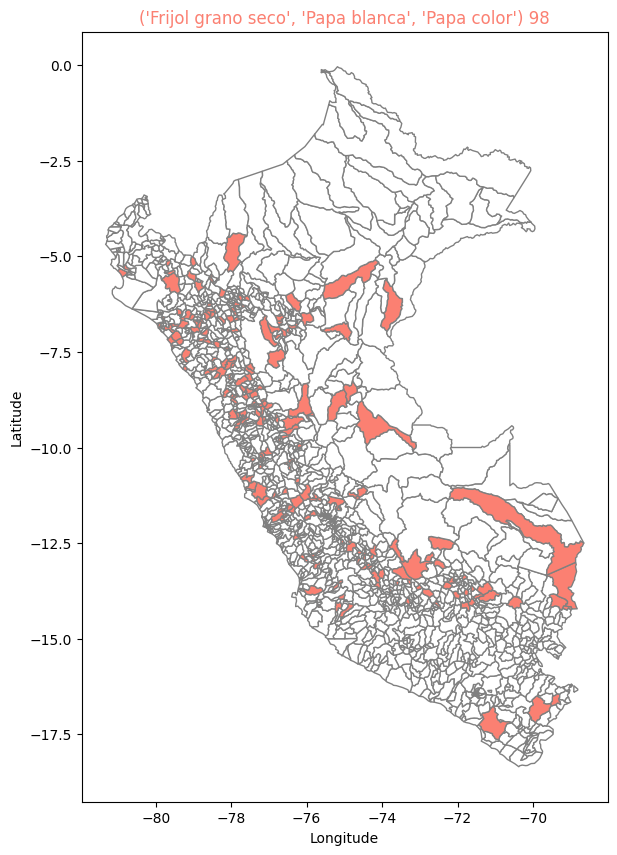

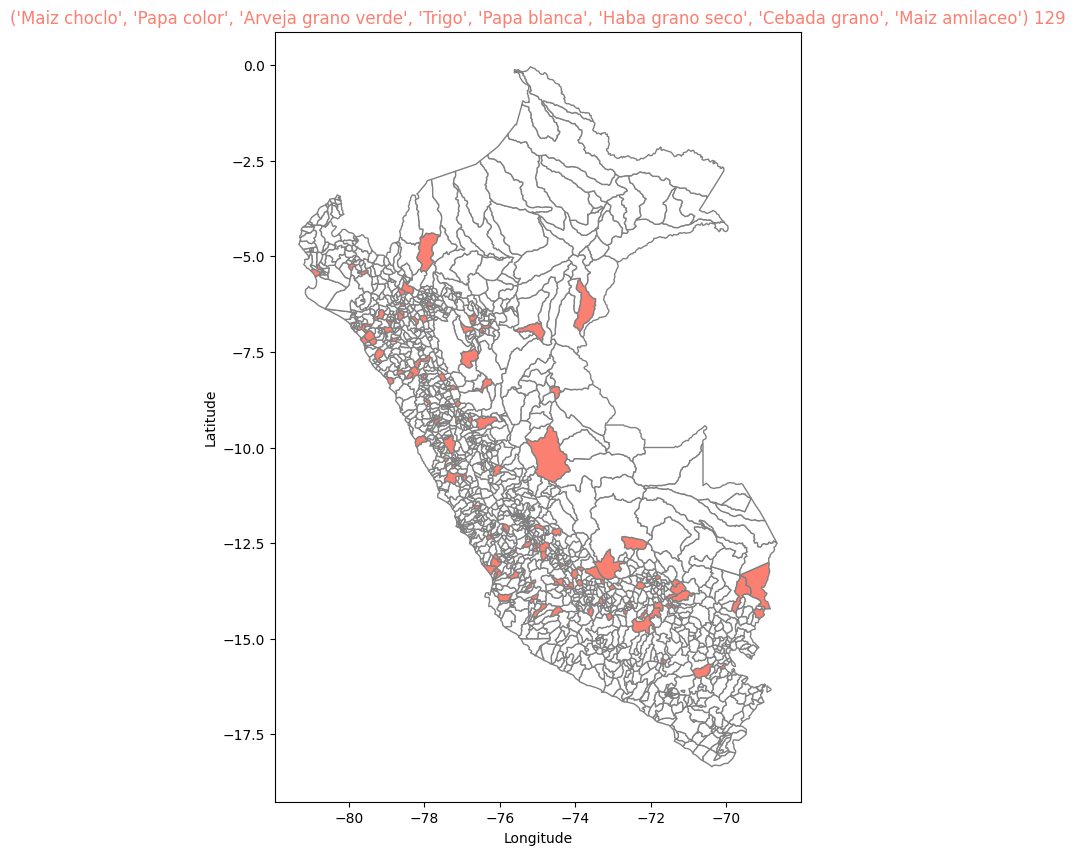

In [184]:
from tables import index
from matplotlib.colors import ListedColormap

def draw_map(df_, row):
  cmap = ListedColormap(index_distritos(df_, row), name='color_distritos')
  ax = data_geojson.plot(figsize=(10,10), edgecolor='gray', cmap=cmap)
  plt.ylabel('Latitude')
  plt.xlabel('Longitude')
  title = str(df_['Itemset'][df_.index[row]]) + ' ' + str(df_['Freq'][df_.index[row]])
  plt.title(title, size=12, color=my_palette(row))
  plt.show()

row = 600
draw_map(df_costa, row)
draw_map(df_not_costa, row)

In [185]:
def draw_map_all(df_):
  my_dpi = 80
  plt.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)
  for i in range(len(df_.index)):
    draw_map(df_, i)
  plt.tight_layout()
  plt.show()

<Figure size 1000x1000 with 0 Axes>

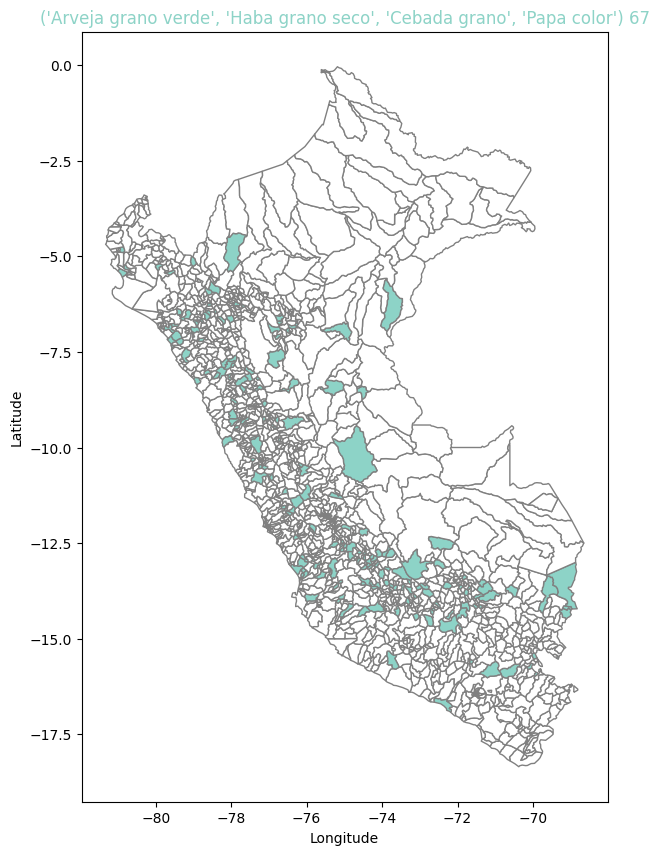

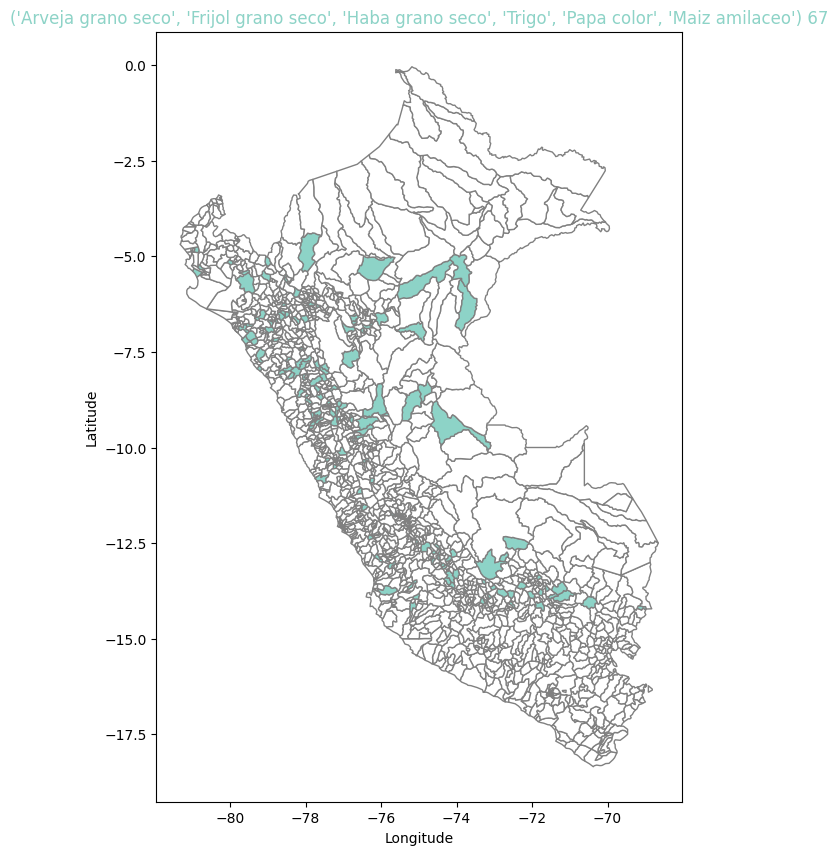

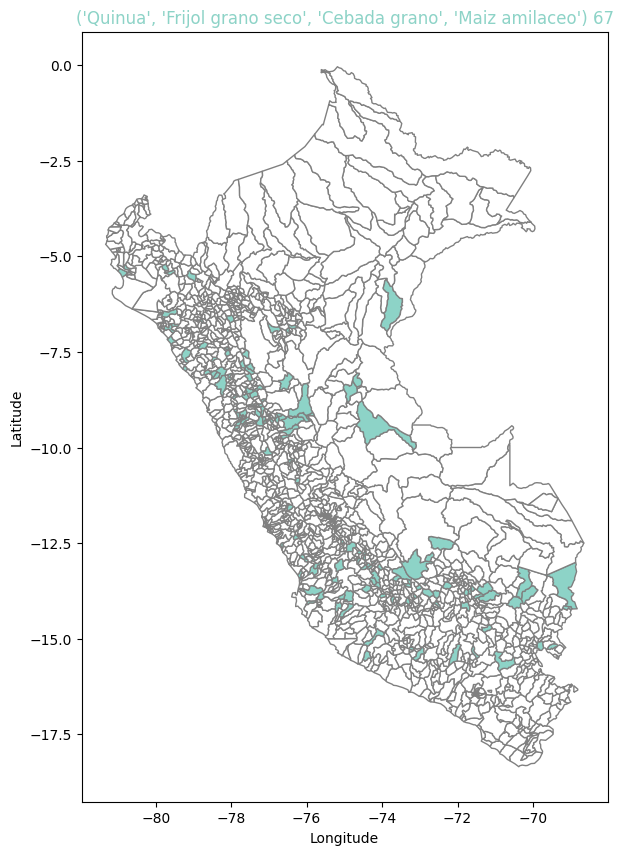

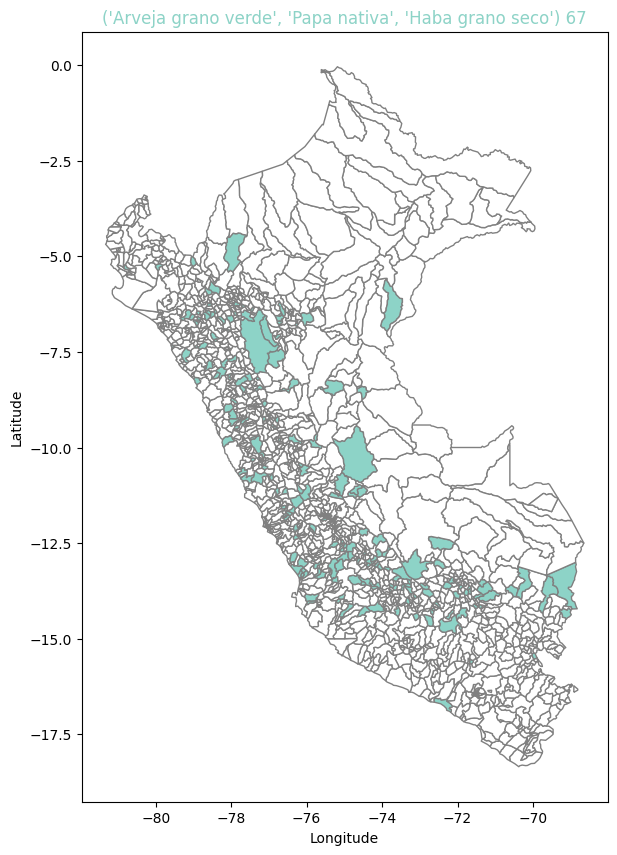

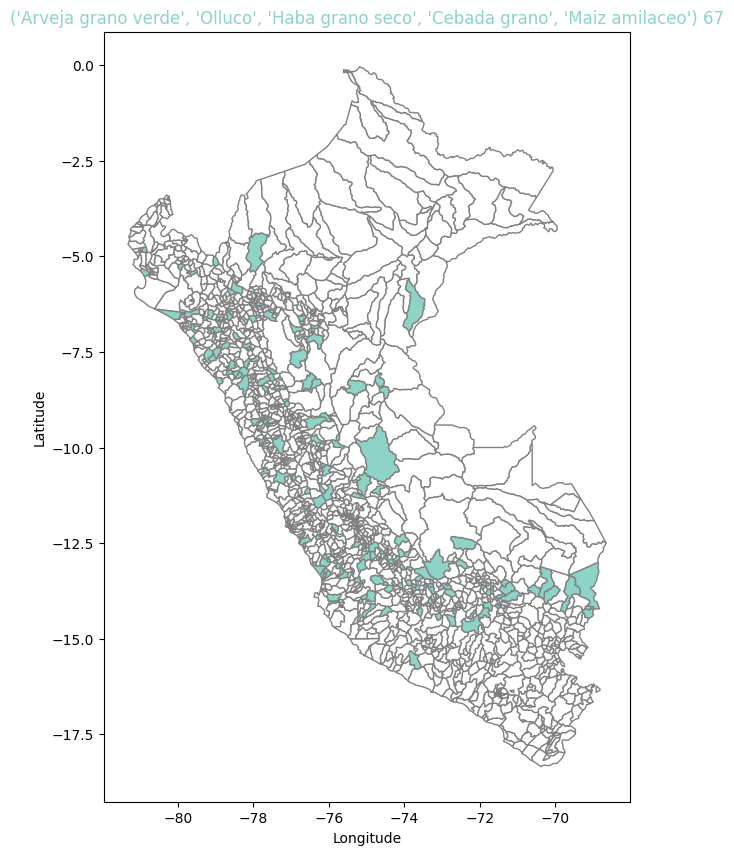

<Figure size 640x480 with 0 Axes>

In [186]:
draw_map_all(df_costa.sort_values(by='Freq', ascending=False).tail(5))

<Figure size 1000x1000 with 0 Axes>

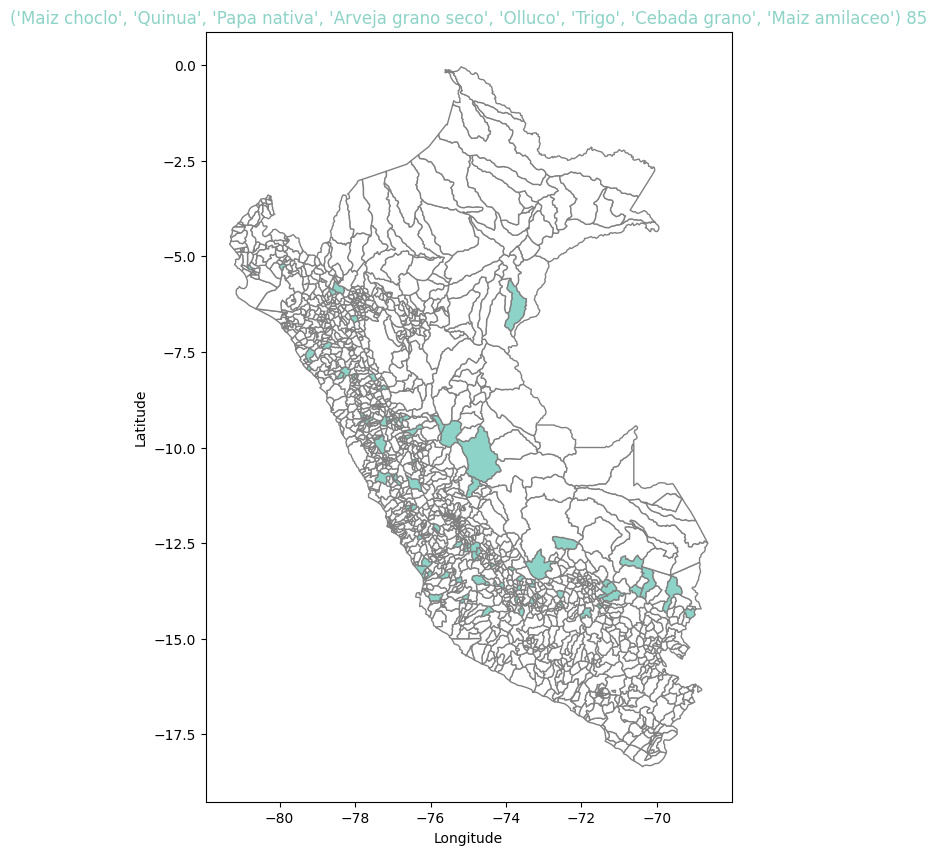

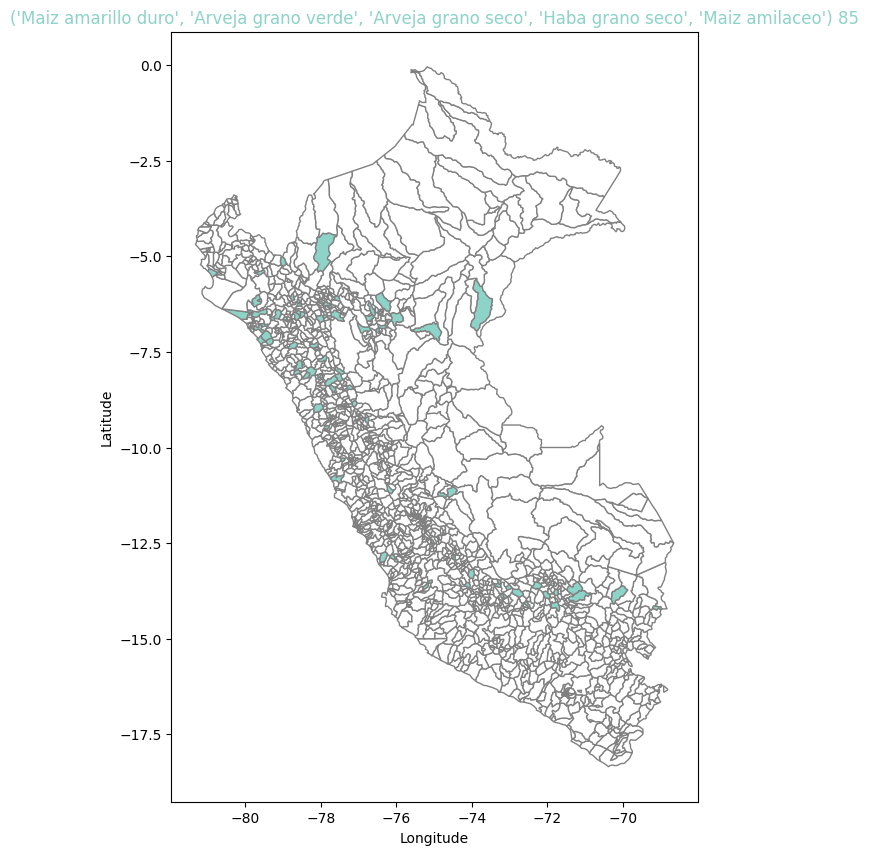

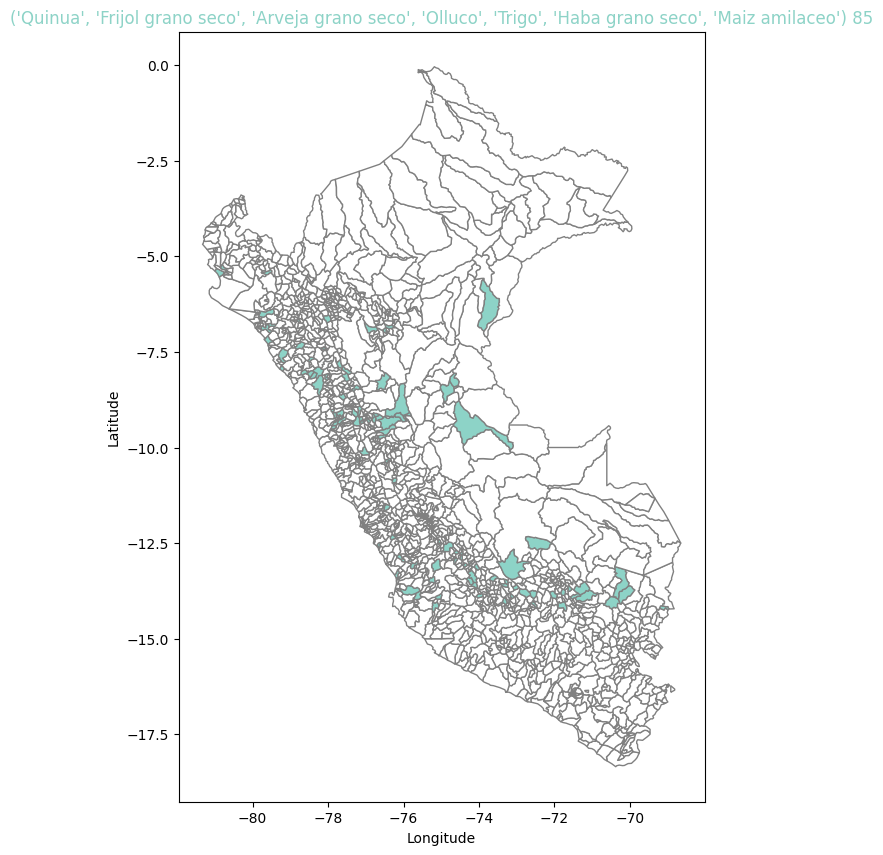

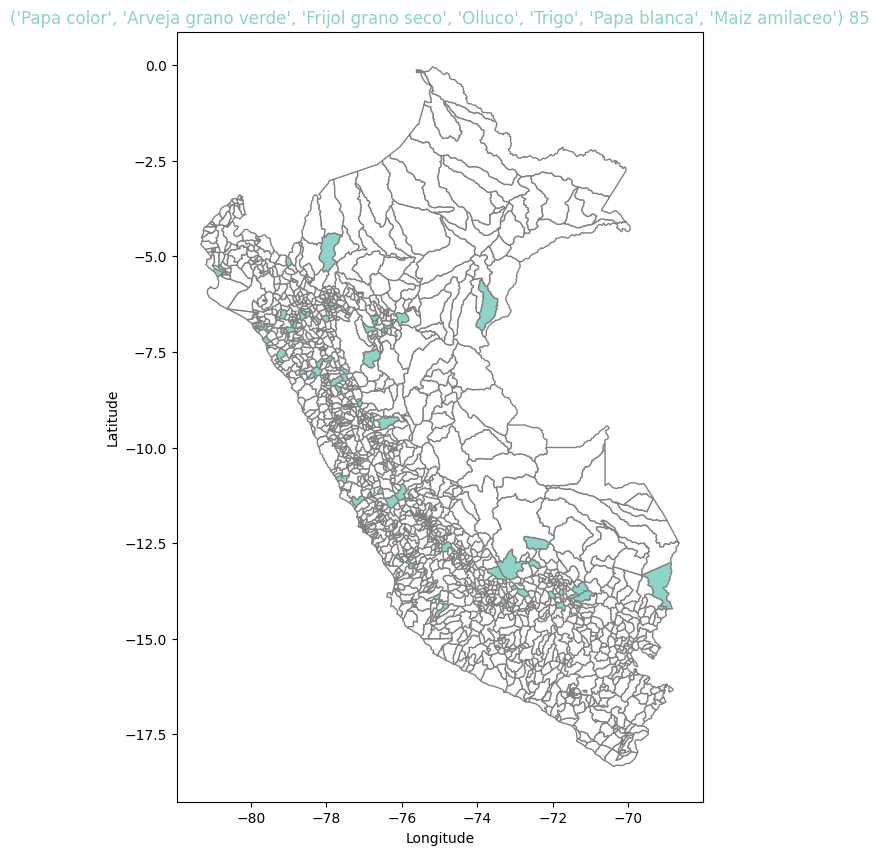

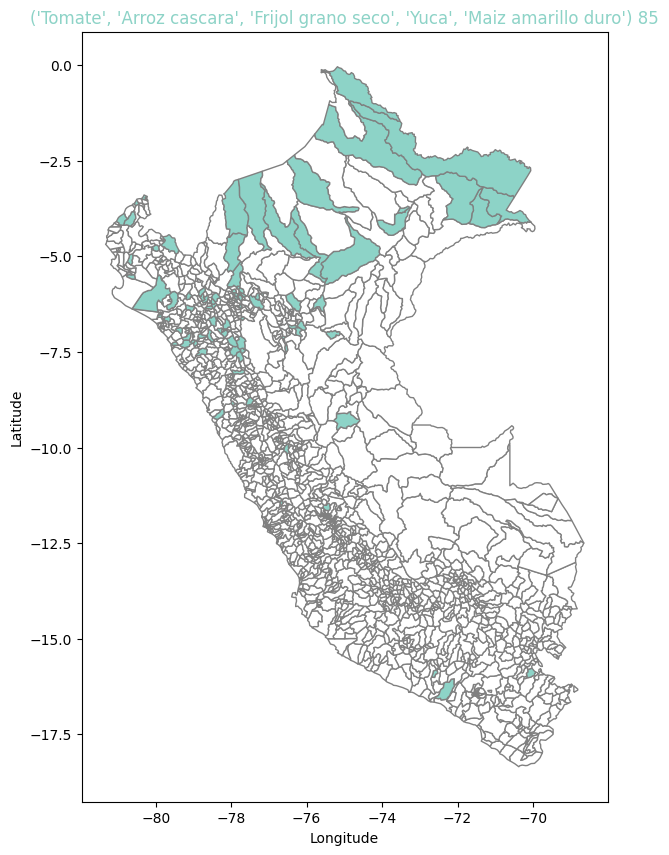

<Figure size 640x480 with 0 Axes>

In [187]:
draw_map_all(df_not_costa.sort_values(by='Freq', ascending=False).tail(5))

In [ ]:
draw_map_all(df_costa.sort_values(by='Freq', ascending=False).tail(5))

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f693365b-561a-4180-803d-6960bdd4f89a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>